# Write a Data Science Blog Post Project 

## `In Hospitality Mortality Prediction`

### <font color = 'brown'>Submitted by Success Donald Attoni </font>

### Table of Content <a id='toc'></a>


[Synopsis](#synopsis)


[1. Data import and Wrangling](#DataImportWrangling) <br>
&emsp;&nbsp;[1.1 Browsing the Data](#BrowsingData)<br>
&emsp;&nbsp;[1.2 Handling Nulls](#HandlingNulls)<br>

[2 Exploratory Data Analysis](#ExploratoryDataAnalysis)<br>
&emsp;&nbsp;[2.1	Demographic Data](#DemographicData)<br>
&emsp;&nbsp;[2.2	Comorbidities](#Comorbidities)<br>
&emsp;&nbsp;[2.3	VitalSigns](#VitalSigns)<br>
&emsp;&nbsp;[2.4	Laboratory Variables](#LaboratoryVariables)<br>
&emsp;&nbsp;[2.5 Correlations and Interdependencies](#CorrAndInterDep)<br>
&emsp;&nbsp;&emsp;&nbsp;[2.5.1 Feature Group A vs Feature Group A](#ParamAvsParamA)<br>
&emsp;&nbsp;&emsp;&nbsp;[2.5.2 Feature Group A vs Feature Group B](#ParamAvsParamB)<br>
&emsp;&nbsp;&emsp;&nbsp;[2.5.3 Feature Group vs Outcome](#ParamvsOutcome)<br>

[3. Data Modelling](#DataModelling)<br>
&emsp;&nbsp;[3.1 Preparing the Data](#DataPrep)<br>
&emsp;&nbsp;[3.2 Normalizaing Numerical Features](#NormNum)<br>
&emsp;&nbsp;[3.3 Shuffle and Split Data](#ShuffleSplitData)<br>
&emsp;&nbsp;[3.4 Creating a Training and Predicting Pipeline](#TrainPredPipe)<br>
&emsp;&nbsp;[3.4 Model Training, Tuning and Evaluation](#ModelTTE)<br>
&emsp;&nbsp;[3.5 Feature Inportance](#FeatureImportance)<br>

[4. Conclusion](#Conclusion)<br>

[5. References](#Reference)<br>


### Synopsis <a id='synopsis'></a>
<div style="text-align: right"
     
[TOC](#toc)

In line with the instruction I opted to work on a dataset of my choice.

This project will be on the [IN HOSPITAL MORTALITY](https://www.kaggle.com/saurabhshahane/in-hospital-mortality-prediction) dataset from kaggle.

The dataset contains information about in-hospital mortality for intensive care units (ICU) - admitted Heart Failure (HF) patients. The information cuts accross demographic characteristics, vital signs, Comorbidities and laboratory data as extracted from tables in the MIMIC iii dataset.

`Demographic characteristics` includes: age at time of hospital admission, gender, BMI

`Vital Signs`: heart rate(HR), systolic blood pressure [SBP], diastolic blood pressure [DBP], mean blood pressure, respiratory rate, body temperature, saturation pulse oxygen [SPO2], urine output [first 24 h]

`Comorbidities`: hypertension, atrial fibrillation, ischemic heart disease, diabetes mellitus, depression, hypoferric anemia, hyperlipidemia, chronic kidney disease (CKD), and chronic obstructive pulmonary disease [COPD]

`Laboratory variables`: hematocrit, red blood cells, mean corpuscular hemoglobin [MCH], mean corpuscular hemoglobin concentration [MCHC], mean corpuscular volume [MCV], red blood cell distribution width [RDW], platelet count, white blood cells, neutrophils, basophils, lymphocytes, prothrombin time [PT], international normalized ratio [INR], NT-proBNP, creatine kinase, creatinine, blood urea nitrogen [BUN] glucose, potassium, sodium, calcium, chloride, magnesium, the anion gap, bicarbonate, lactate, hydrogen ion concentration [pH], partial pressure of CO2 in arterial blood, and LVEF

The `Demographic Characteristics` and `Vital Signs` extracted were recorded during the ﬁrst 24 hours of each admission and `Laboratory Variables` were measured during the entire ICU stay. `Comorbidities` were identified using ICD-9 codes. For variable data with multiple measurements, the calculated mean value was included for analysis. 

The vital status(Target Variable - Outcome) at the time of hospital discharge in survivors and non-survivors is also recorded in the dataset, where:
- 0 - Alive
- 1 - Dead



Dataset Acknowledgements
Zhou, Jingmin et al. (2021), Prediction model of in-hospital mortality in intensive care unit patients with heart failure: machine learning-based, retrospective analysis of the MIMIC-III database, Dryad, Dataset, https://doi.org/10.5061/dryad.0p2ngf1zd

LICENSE - CC0 1.0 Universal (CC0 1.0) Public Domain Dedication


#### And the questions I am interested providing insights to are listed below:



	What are the top 3 prevalent comorbidities in HF patients and the risk level with age? <br>
	What are the major inter-relationships between the vital signs related to HF?<br>
	What are the major inter-relationships between the comorbidities related to HF?<br>
	What are the top 5 predictive features of mortality in HF patients?<br>



## 1. Data Import and Wrangling <a id='DataImportWrangling'></a>
<div style="text-align: right"
     
[TOC](#toc)

In [184]:
# import the relevant libraries

import pandas as pd
import numpy as np
import seaborn as sb

### import Machine learning libraries

import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier # 3 Supervised learning models
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from time import time

barcolor = sb.color_palette('Blues')[3]

import visuals as vs

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data.csv')

### 1.1 Browsing the Data <a id='BrowsingData'></a>
<div style="text-align: right"
     
[TOC](#toc)

In [185]:
# viewing the first 5 rows of the data
df.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

In [186]:
# Rename the gendera field to gender
df.rename(columns = {'gendera': 'gender'}, inplace = True)

Note: In the gender encoding, 1 = F-Female, 2 = M-Male

In [187]:
#View the field listing datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gender                    1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [188]:
df.describe()

group             ID      outcome          age       gender  \
count  1177.000000    1177.000000  1176.000000  1177.000000  1177.000000   
mean      1.299065  150778.120646     0.135204    74.055225     1.525064   
std       0.458043   29034.669513     0.342087    13.434061     0.499584   
min       1.000000  100213.000000     0.000000    19.000000     1.000000   
25%       1.000000  125603.000000     0.000000    65.000000     1.000000   
50%       1.000000  151901.000000     0.000000    77.000000     2.000000   
75%       2.000000  176048.000000     0.000000    85.000000     2.000000   
max       2.000000  199952.000000     1.000000    99.000000     2.000000   

              BMI  hypertensive  atrialfibrillation  CHD with no MI  \
count  962.000000   1177.000000         1177.000000     1177.000000   
mean    30.188278      0.717927            0.451147        0.085811   
std      9.325997      0.450200            0.497819        0.280204   
min     13.346801      0.000000            0.000000        0.000000   
25%     24.326461      0.000000            0.000000        0.000000   
50%     28.312474      1.000000            0.000000        0.000000   
75%     33.633509      1.000000            1.000000        0.000000   
max    104.970366      1.000000            1.000000        1.000000   

          diabetes  ...  Blood sodium  Blood calcium     Chloride  \
count  1177.000000  ...   1177.000000    1176.000000  1177.000000   
mean      0.421410  ...    138.890016       8.500894   102.283835   
std       0.493995  ...      4.151347       0.572263     5.339733   
min       0.000000  ...    114.666667       6.700000    80.266667   
25%       0.000000  ...    136.666667       8.148864    99.000000   
50%       0.000000  ...    139.250000       8.500000   102.500000   
75%       1.000000  ...    141.600000       8.869063   105.571429   
max       1.000000  ...    154.736842      10.950000   122.526316   

         Anion gap  Magnesium ion          PH  Bicarbonate  Lactic acid  \
count  1177.000000    1177.000000  885.000000  1177.000000   948.000000   
mean     13.925094       2.120169    7.378532    26.911766     1.853426   
std       2.652732       0.251532    0.067320     5.167512     0.983819   
min       6.636364       1.400000    7.090000    12.857143     0.500000   
25%      12.250000       1.955556    7.334615    23.454545     1.200000   
50%      13.666667       2.092308    7.380000    26.500000     1.600000   
75%      15.416667       2.241667    7.430000    29.875000     2.200000   
max      25.500000       4.072727    7.580000    47.666667     8.333333   

             PCO2           EF  
count  883.000000  1177.000000  
mean    45.535382    48.715378  
std     12.711271    12.868436  
min     18.750000    15.000000  
25%     37.038462    40.000000  
50%     43.000000    55.000000  
75%     50.585784    55.000000  
max     98.600000    75.000000  

[8 rows x 51 columns]

Above table shows that there are some columns with null values

### 1.2 Handling Nulls <a id='HandlingNulls'></a>
<div style="text-align: right"
     
[TOC](#toc)

In [189]:
# duplicate data for cleaning
df_cleaned = df.copy()

In [190]:
# get count of null values in columns with nulls
df_null_count = df_cleaned.isna().sum().reset_index().rename(columns={0:'null_count'})
df_null_count.query('null_count > 0')

index  null_count
2                    outcome           1
5                        BMI         215
15                heart rate          13
16   Systolic blood pressure          16
17  Diastolic blood pressure          16
18          Respiratory rate          13
19               temperature          19
20                     SP O2          13
21              Urine output          36
30               Neutrophils         144
31                 Basophils         259
32                Lymphocyte         145
33                        PT          20
34                       INR          20
36           Creatine kinase         165
39                   glucose          18
42             Blood calcium           1
46                        PH         292
48               Lactic acid         229
49                      PCO2         294

##### `Addressing nans in outcome`

Since this is our target variable. Any row where an outcome is not provided will be dropped as it is difficult to input a meaningful value in this column

In [191]:
#Shape before droping row with nan in outcome field
df_cleaned.shape

(1177, 51)

In [192]:
# Droping row where outcome is nan
df_cleaned = df_cleaned[df_cleaned['outcome'].isna() == False]

In [193]:
#Shape after droping row with nan in outcome field
df_cleaned.shape

(1176, 51)

##### `Addressing nans in BMI`

Lets look at the distibution of the BMIs as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

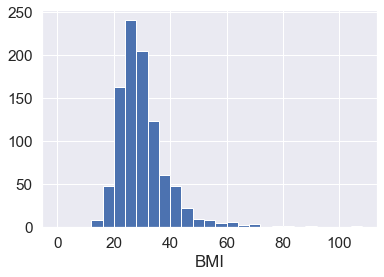

In [194]:
# code block to view distribution of variable
fig = plt.figure(figsize = [6,4])

sb.set(font_scale=1.4)

binsize = 4
bins = np.arange(0,df_cleaned['BMI'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'BMI', bins = bins)
plt.xlabel('BMI');

To handle nans in BMI, we create an age_group colume and a gender_txt column. 
We will visually check how differenct the averages of the BMIs per age_group and per gender are 
- if they are not very different we will insert the average BMI per age-group in place of nans
- otherwise we will insert the average BMI per age-group, per gender.


In [195]:
#Function to engode age into age_groups

def age_group(int_age):
    if int_age<=29:
        return '18-29'
    elif int_age <= 39:
        return '30-39'
    elif int_age <= 49:
        return '40-49'
    elif int_age <= 59:
        return '50-59'
    elif int_age <= 69:
        return '60-69'
    elif int_age <= 79:
        return '70-79'
    elif int_age <= 89:
        return '80-89'
    else:
        return '90+'   

In [196]:
df_cleaned['age_group'] = df_cleaned['age'].apply(lambda x: age_group(x))

In [197]:
#gender_txt column added to enhance visualization of gender (1 - F vs 2 - Male) on plots
df_cleaned['gender_txt'] = df_cleaned['gender'].apply(lambda x: 'F' if x == 1 else 'M')

In [198]:
# age_order - variable used to order the x-axis of plots with the age-group on the x-axis
age_order = {'18-29':1, '30-39':2, '40-49':3,'50-59' : 4, '60-69' : 5, '70-79': 6, '80-89' : 7, 
            '90+': 8}

`Utility cleaning functions:`

In [199]:
#Routine to input the mean of a paramter wrt age-group and gender in place of nan

def fillna_wrt_age_n_gender(dframe, dcol):
    avg_col_per_age_group = dframe.groupby(['age_group', 'gender_txt'])[dcol].mean().reset_index()
    
    #left join the df_cleand and avg_col_per_age_group dataframes
    dframe = pd.merge(dframe, avg_col_per_age_group, on = ['age_group', 'gender_txt'],
                how = 'left')
    
    #Replace nan with respective avgerages for the age_group and gender
    dframe[dcol + '_x'].fillna(dframe[dcol + '_y'], inplace = True)
    
    #Drop dummy columns
    dframe.drop(columns = [dcol + '_y'], inplace = True)
    
    #Rename colums to initial column name
    dframe.rename(columns = {dcol + '_x': dcol}, inplace = True)
    
    return dframe

In [200]:
#Routine to input the mean of a paramter wrt age-group in place of nan

def fillna_wrt_age(dframe, dcol):
    avg_col_per_age_group = dframe.groupby('age_group')[dcol].mean().reset_index()
    
    #left join the df_cleand and avg_col_per_age_group dataframes
    dframe = pd.merge(dframe, avg_col_per_age_group, on = ['age_group'],
                how = 'left')
    
    #Replace nan with respective avgerages for the age_group
    dframe[dcol + '_x'].fillna(dframe[dcol + '_y'], inplace = True)
    
    #Drop dummy columns
    dframe.drop(columns = [dcol + '_y'], inplace = True)
    
    #Rename colums to initial column name
    dframe.rename(columns = {dcol + '_x': dcol}, inplace = True)
    
    return dframe

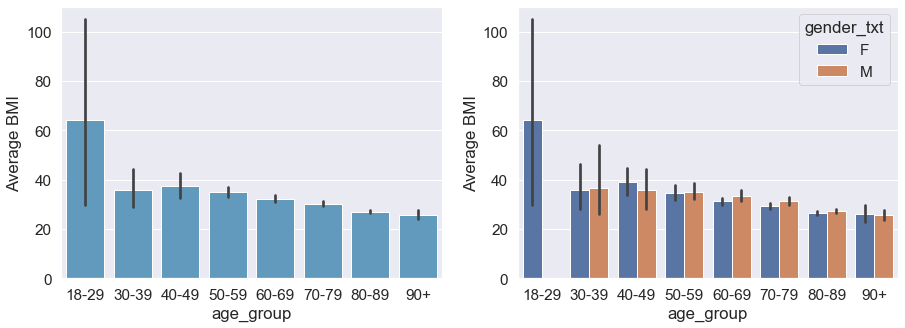

In [201]:
# View averages of BMI wrt to age-group and sex

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="BMI", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average BMI')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="BMI", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average BMI');

the average BMI for age_group 18_29 seems high, lets investigate this further with a box plot

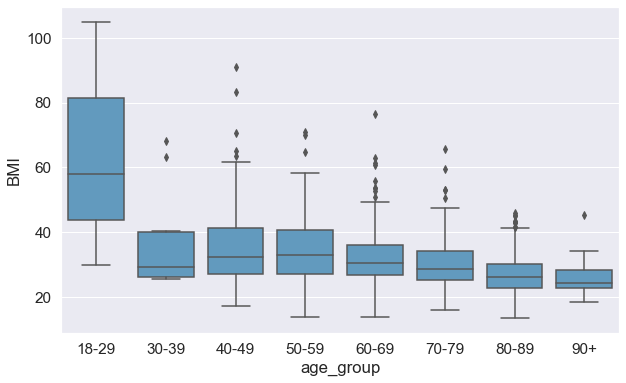

In [202]:
plt.figure(figsize=[10,6])
plt.subplot(1,1,1)
ax = sb.boxplot(x="age_group", y="BMI", data=df_cleaned, color = barcolor, order = age_order)

While the box plot above suggests that there is no BMI outlier in the 18_29. The occurence of a BMI greater than 100 in this age_group skwes the data relative to the other age_groups. Thus we will set the BMI that is greater than 100 to nan and fill it with the mean for this age_group

In [203]:
#The BMI of 100 will be deemed as an outlier as it is overly skewing the data in the 18 - 29 age_group
#Setting BMI > 100 to NaN
df_cleaned['BMI'] = df['BMI'].apply(lambda x: np.NaN if x > 100 else x)

In [204]:
# fill the BMI
df_cleaned = fillna_wrt_age(df_cleaned, 'BMI')

In [205]:
# Check that there are no more nan values in the BMI column.
df_cleaned['BMI'].isna().sum()

0

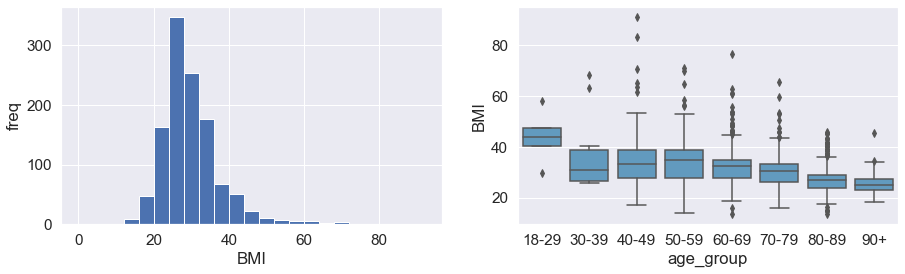

In [206]:
# Check that the BMI distibution is not significantly different from the pre-processed BMI distribution

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['BMI'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'BMI', bins = bins)
plt.xlabel('BMI')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="BMI", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in heart rate`

Lets look at the distibution of the heart rate as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

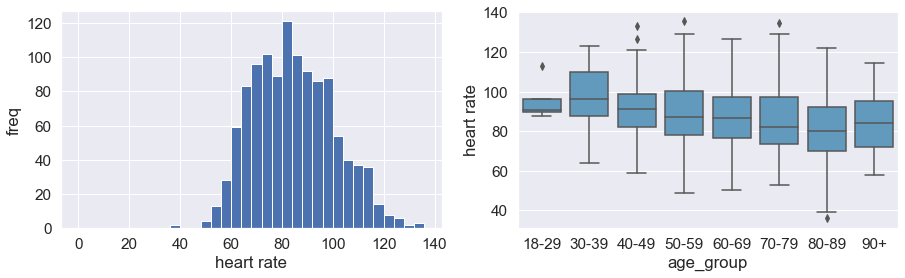

In [207]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['heart rate'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'heart rate', bins = bins)
plt.xlabel('heart rate')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="heart rate", data=df_cleaned, color = barcolor, order = age_order);

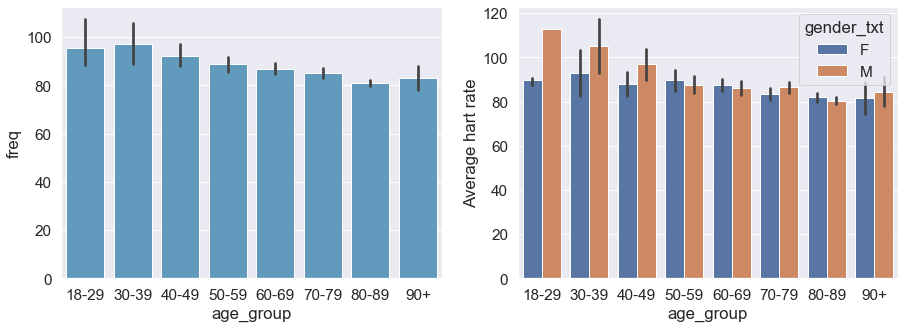

In [208]:
# View averages of heart rate wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="heart rate", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average heart rate')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="heart rate", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average hart rate');

There is marked difference in the averages bertween the avg rates for 18-29 and 30-39 age_groups between Females and Males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [209]:
# fill nans in the heart rate column
df_cleaned = fillna_wrt_age(df_cleaned, 'heart rate')

In [210]:
# Check that there are no more nan values in the heart rate column.
df_cleaned['heart rate'].isna().sum()

0

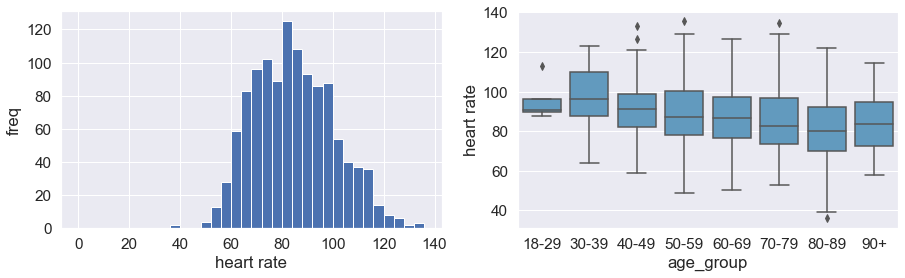

In [211]:
# Check that the heart rate distribution is not significantly different from the pre-processed BMI

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['heart rate'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'heart rate', bins = bins)
plt.xlabel('heart rate')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="heart rate", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in Systolic Blood Pressure`

Lets look at the distibution of the Systolic blood pressure as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

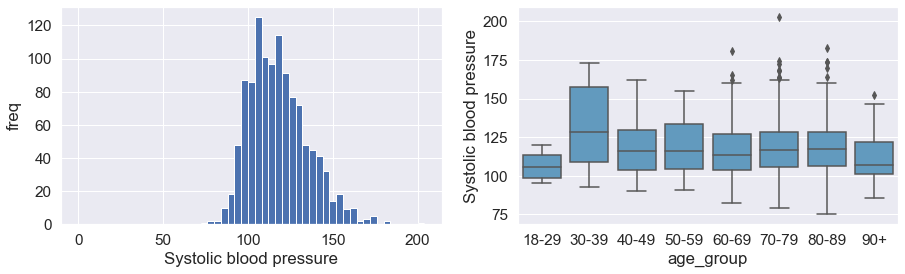

In [212]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['Systolic blood pressure'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Systolic blood pressure', bins = bins)
plt.xlabel('Systolic blood pressure')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Systolic blood pressure", data=df_cleaned, color = barcolor, order = age_order);

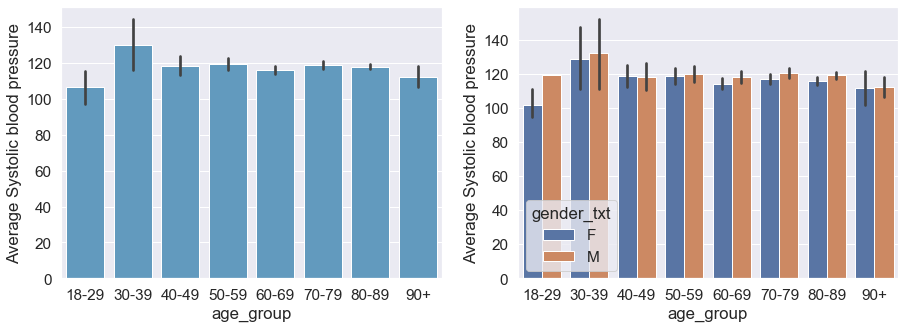

In [213]:
# View averages of systolic blood pressure wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Systolic blood pressure", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average Systolic blood pressure')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Systolic blood pressure", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Systolic blood pressure');

There is marked difference in the averages bertween the avg rates for 18-29 and 30-39 age_groups between Females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [214]:
# fill nans in the Systolic blood pressure column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Systolic blood pressure')

In [215]:
# Check that there are no more nan values in the Systolic blood pressure column.
df_cleaned['Systolic blood pressure'].isna().sum()

0

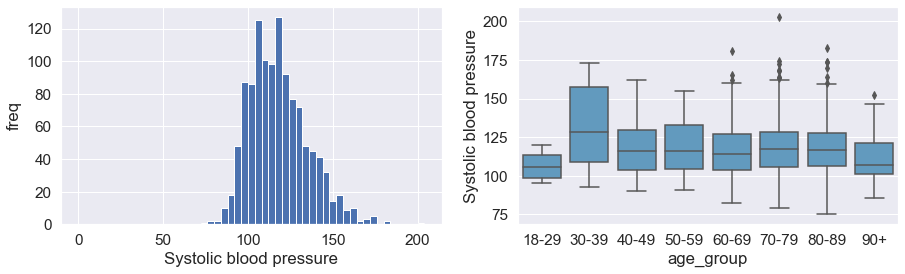

In [216]:
# Check that the Systolic blood pressure distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['Systolic blood pressure'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Systolic blood pressure', bins = bins)
plt.xlabel('Systolic blood pressure')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Systolic blood pressure", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in Diastolic Blood Pressure`

Lets look at the distibution of the Diastolic blood pressure as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

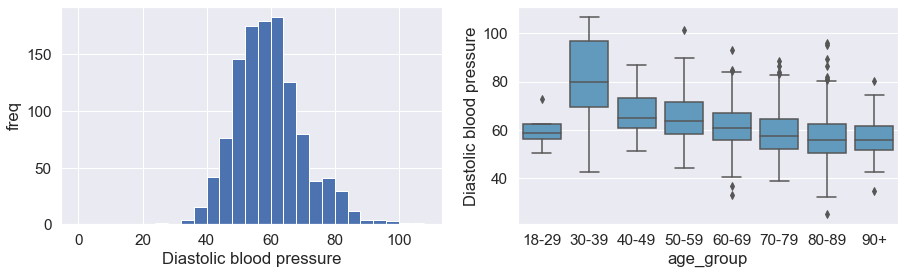

In [217]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['Diastolic blood pressure'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Diastolic blood pressure', bins = bins)
plt.xlabel('Diastolic blood pressure')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Diastolic blood pressure", data=df_cleaned, color = barcolor, order = age_order);

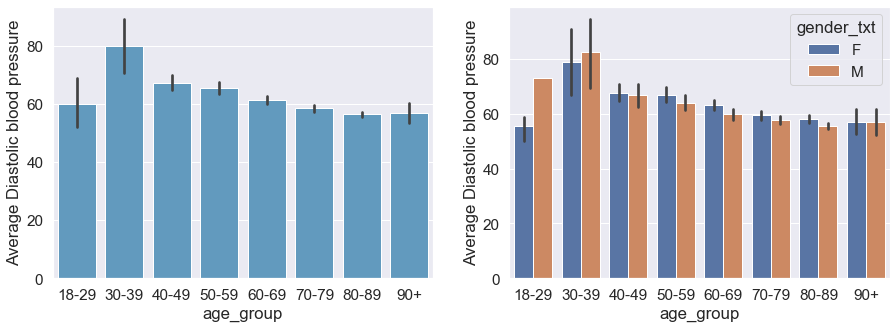

In [218]:
# View averages of Diastolic Blood Pressure  wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Diastolic blood pressure", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average Diastolic blood pressure')


plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Diastolic blood pressure", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Diastolic blood pressure');

There is marked difference in the averages bertween the avg rates for 18-29 and 30-39 age_groups between Females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [219]:
# fill nans in the heart rate column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Diastolic blood pressure')

In [220]:
# Check that there are no more nan values in the heart rate column.
df_cleaned['Diastolic blood pressure'].isna().sum()

0

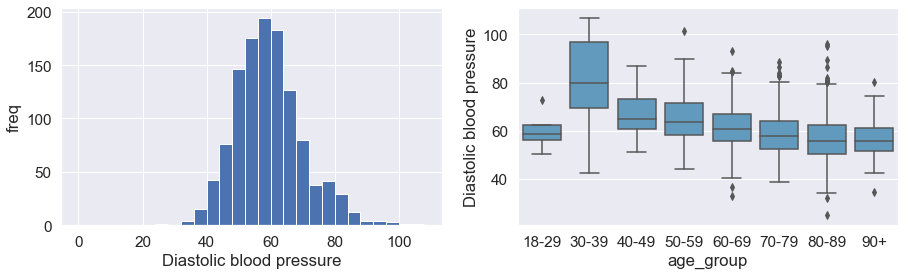

In [221]:
# Check that the Diastolic blood pressure distibution is not significantly different from the data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['Diastolic blood pressure'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Diastolic blood pressure', bins = bins)
plt.xlabel('Diastolic blood pressure')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Diastolic blood pressure", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in Respiratory rate`

Lets look at the distibution of the Respiratory blood pressure as a reference. 
We want to ensure that after addressing the nans the property dristribution is similar to the original distibution.

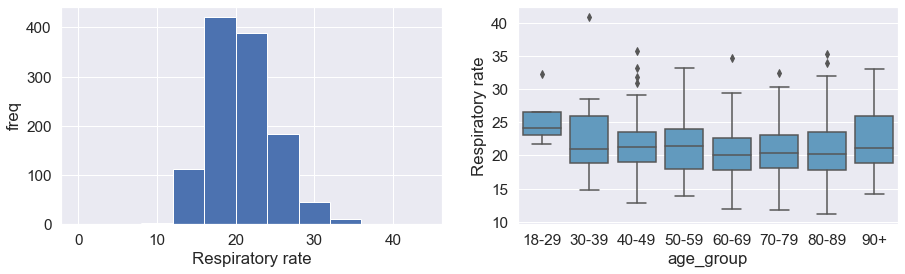

In [222]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['Respiratory rate'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Respiratory rate', bins = bins)
plt.xlabel('Respiratory rate')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Respiratory rate", data=df_cleaned, color = barcolor, order = age_order);

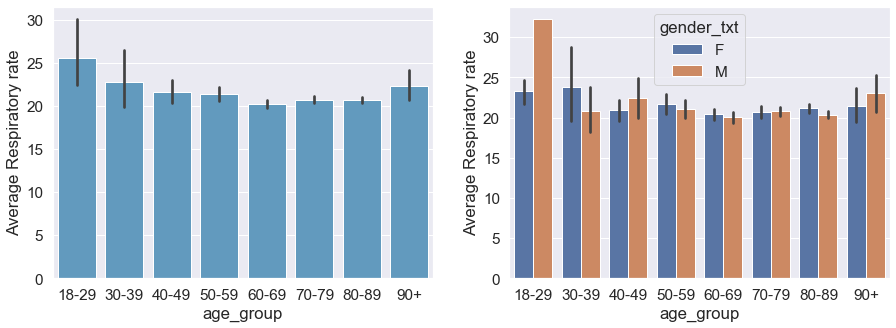

In [223]:
# View averages of Respiratory Rate wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Respiratory rate", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average Respiratory rate')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Respiratory rate", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Respiratory rate');

There is marked difference in the averages bertween the avg rates for 18-29 and 30-39 age_groups between Females and Males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [224]:
# fill nans in the respiratory rate column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Respiratory rate')

In [225]:
# Check that there are no more nan values in the respiratory rate column.
df_cleaned['Respiratory rate'].isna().sum()

0

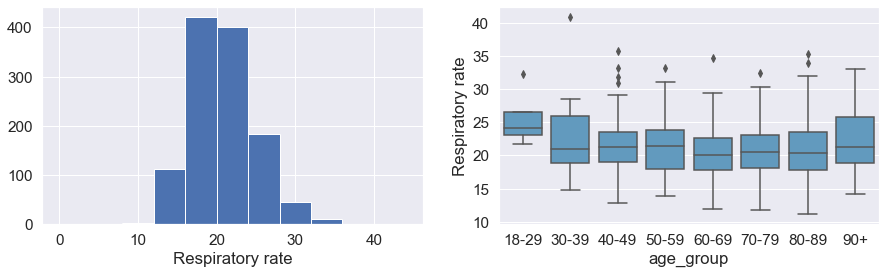

In [226]:
# Check that the respiratory rate distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 4
bins = np.arange(0,df_cleaned['Respiratory rate'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Respiratory rate', bins = bins)
plt.xlabel('Respiratory rate')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Respiratory rate", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in temperature`

Lets look at the distibution of the Temperature as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distribution

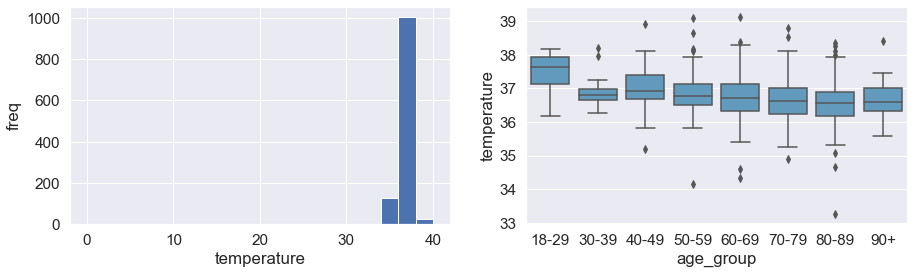

In [227]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 2
bins = np.arange(0,df_cleaned['temperature'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'temperature', bins = bins)
plt.xlabel('temperature')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="temperature", data=df_cleaned, color = barcolor, order = age_order);

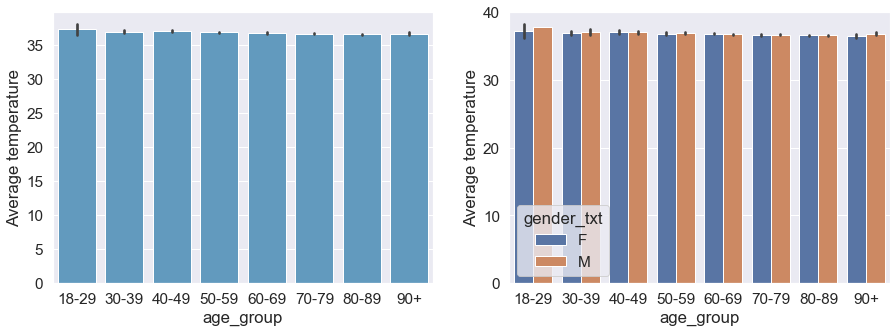

In [228]:
# View averages of temperature wrt to age-group and sex

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="temperature", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average temperature')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="temperature", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average temperature');

There is no marked difference in the averages betwen all age groups and gender thus we'll fill in the nans with the averages with respect to age_group only.

In [229]:
# fill nans in the heart rate column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'temperature')

In [230]:
# Check that there are no more nan values in the heart rate column.
df_cleaned['temperature'].isna().sum()

0

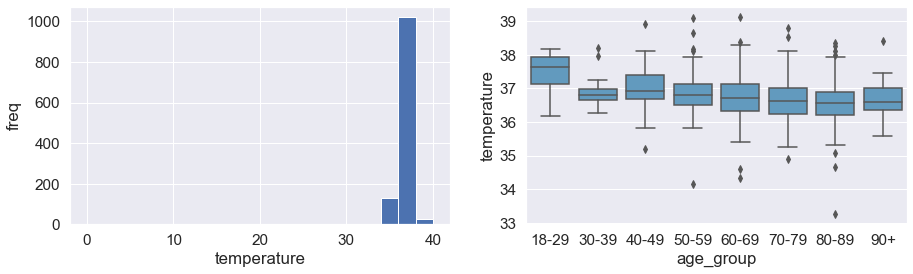

In [231]:
# Check that the temperature distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 2
bins = np.arange(0,df_cleaned['temperature'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'temperature', bins = bins)
plt.xlabel('temperature')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="temperature", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in SP O2`

Lets look at the distibution of  SP O2 as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

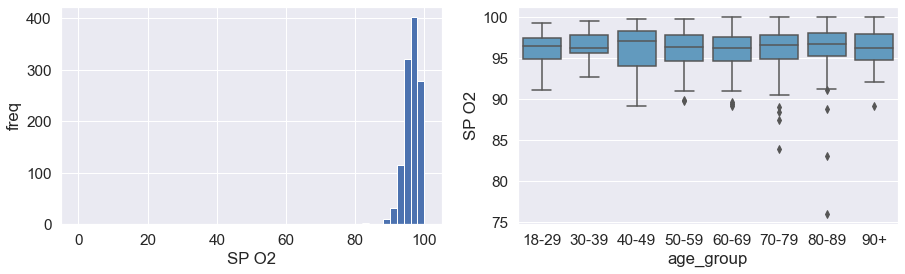

In [232]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 2
bins = np.arange(0,df_cleaned['SP O2'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'SP O2', bins = bins)
plt.xlabel('SP O2')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="SP O2", data=df_cleaned, color = barcolor, order = age_order);

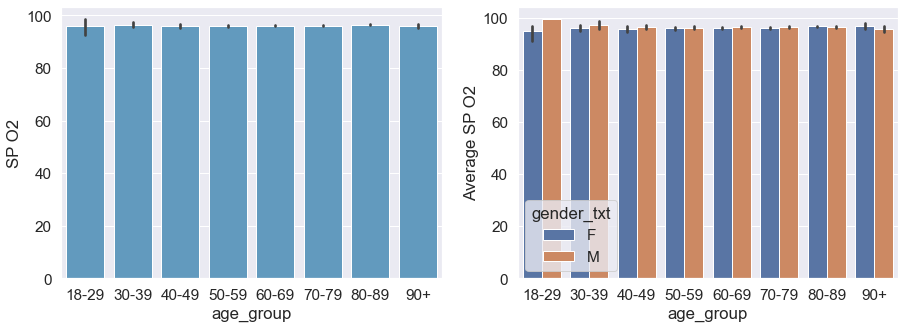

In [233]:
# View averages of SP O2 wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="SP O2", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('SP O2')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="SP O2", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average SP O2');

There is no marked difference in the averages between genders in each of the age_groups, thus we'll fill in the nans with the averages per age_group.

In [234]:
# fill nans in the heart rate column
df_cleaned = fillna_wrt_age(df_cleaned, 'SP O2')

In [235]:
# Check that there are no more nan values in the heart rate column.
df_cleaned['SP O2'].isna().sum()

0

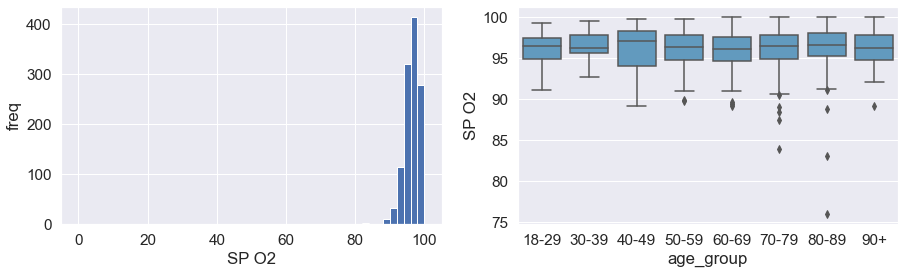

In [236]:
# Check that the SP 02 distibution is not significantly different from the pre-processed BMI

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 2
bins = np.arange(0,df_cleaned['SP O2'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'SP O2', bins = bins)
plt.xlabel('SP O2')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="SP O2", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in Urin output`

Lets look at the distribution of  Urine Output as a reference. 
We want to ensure that after addressing the nans the property distribution is similar to the original distribution.

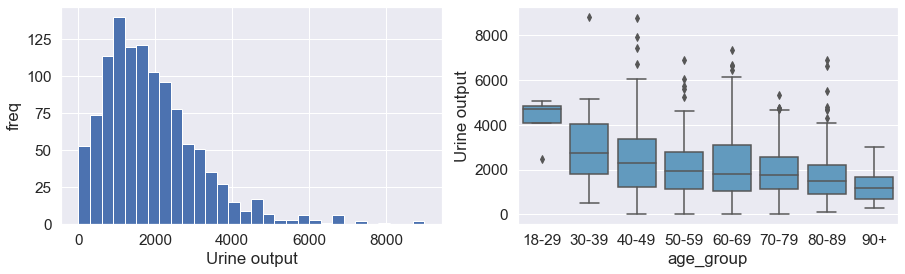

In [237]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 300
bins = np.arange(0,df_cleaned['Urine output'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Urine output', bins = bins)
plt.xlabel('Urine output')
plt.ylabel('freq');

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Urine output", data=df_cleaned, color = barcolor, order = age_order);

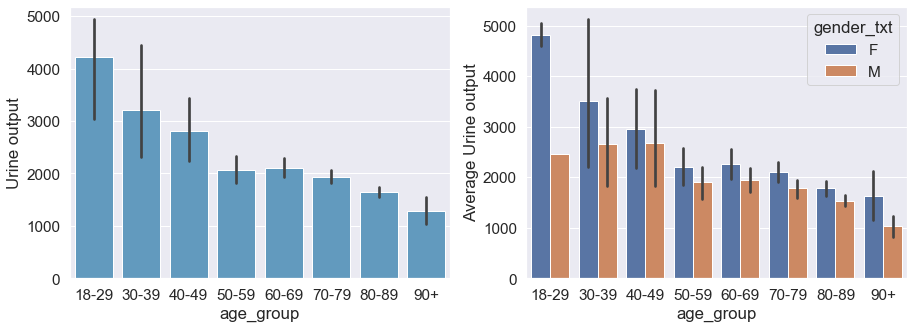

In [238]:
# View averages of Urine Output wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Urine output", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Urine output')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Urine output", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Urine output');

There is marked difference in the averages between males and females across most of the age groups, thus we'll fill in the NaNs with the averages with respect to age_group and gender.

In [239]:
# fill nans in the Urine Output column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Urine output')

In [240]:
# Check that there are no more nan values in the Urine Output column.
df_cleaned['Urine output'].isna().sum()

0

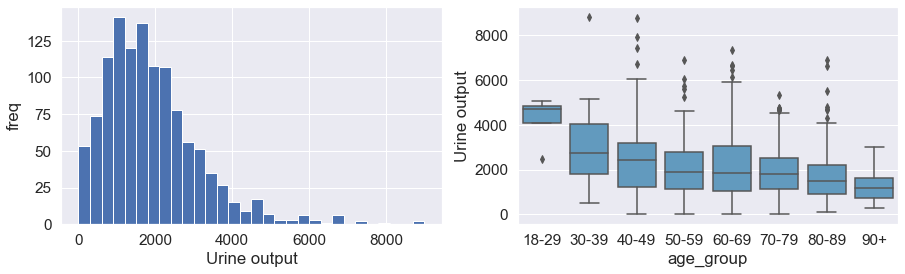

In [241]:
# Check that the Urine output distribution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 300
bins = np.arange(0,df_cleaned['Urine output'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Urine output', bins = bins)
plt.xlabel('Urine output')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Urine output", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in Neutrophils`

Lets look at the distibution of  Neutrophils as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

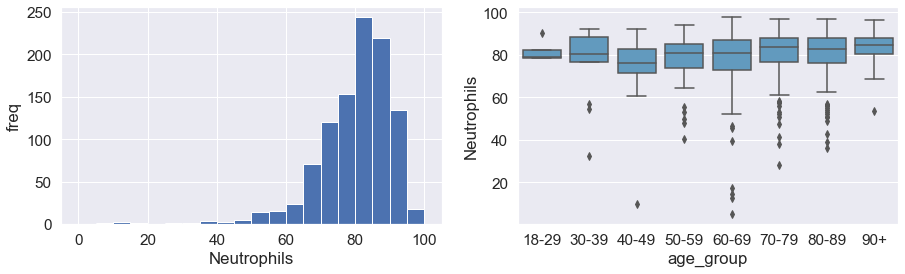

In [242]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 5
bins = np.arange(0,df_cleaned['Neutrophils'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Neutrophils', bins = bins)
plt.xlabel('Neutrophils')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Neutrophils", data=df_cleaned, color = barcolor, order = age_order);

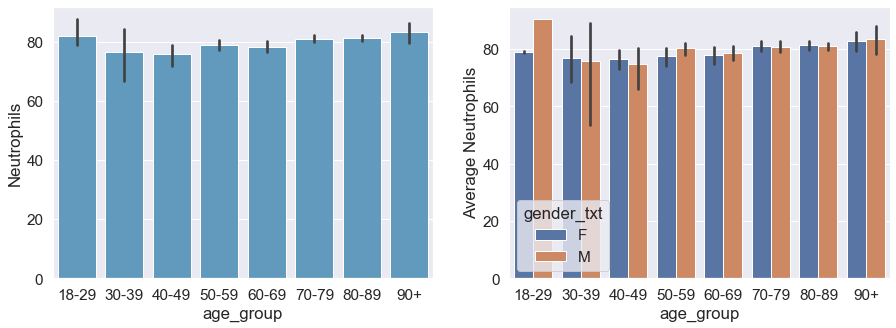

In [243]:
# View averages of Neutrophils wrt to age-group and sex
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Neutrophils", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Neutrophils')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Neutrophils", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Neutrophils');

There is marked difference in the averages for age_group 18-29 between Females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [244]:
# fill nans in the Neutrophils column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Neutrophils')

In [245]:
# Check that there are no more nans in the Neutrophils column.
df_cleaned['Neutrophils'].isna().sum()

0

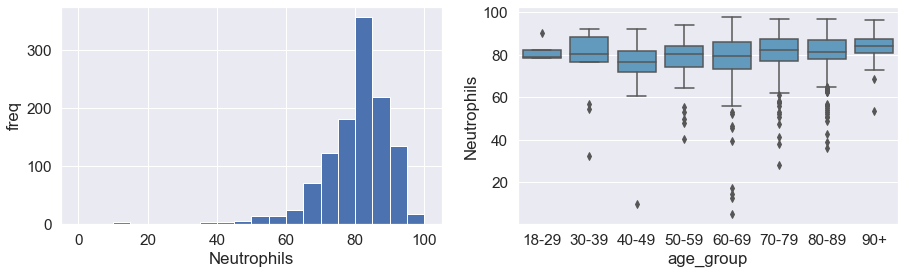

In [246]:
# Check that the Neutrophils distibution is not significantly different from the pre-processed data
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 5
bins = np.arange(0,df_cleaned['Neutrophils'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Neutrophils', bins = bins)
plt.xlabel('Neutrophils')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Neutrophils", data=df_cleaned, color = barcolor, order = age_order);


##### `Addressing nans in Basophils`

Lets look at the distibution of  Basophils as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

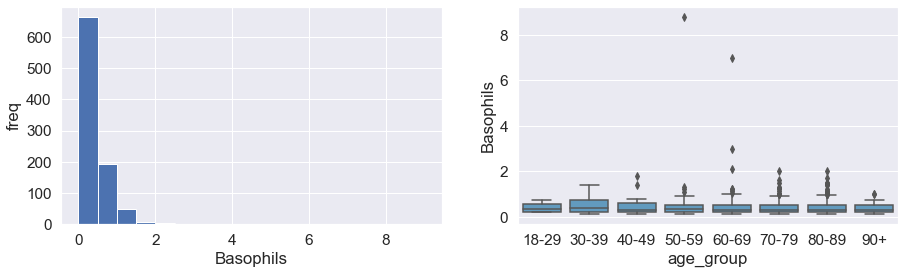

In [247]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.5
bins = np.arange(0,df_cleaned['Basophils'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Basophils', bins = bins)
plt.xlabel('Basophils')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Basophils", data=df_cleaned, color = barcolor, order = age_order);

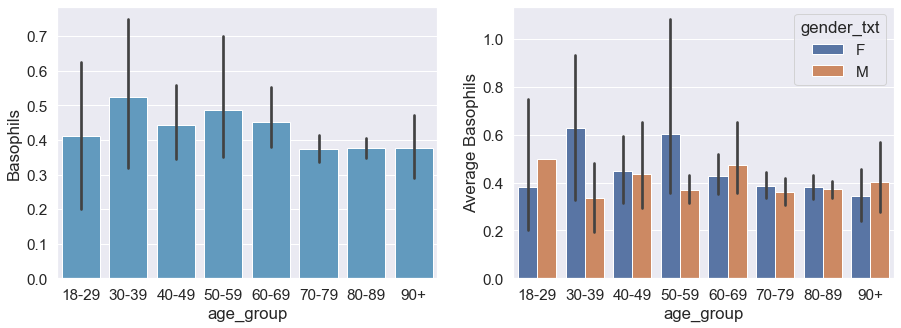

In [248]:
# View averages of Basophils wrt to age-group and sex

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Basophils", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Basophils')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Basophils", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Basophils');

There is marked difference in the averages for each age_group between Females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [249]:
# fill nans in the heart Basophils column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Basophils')

In [250]:
# Check that there are no more nan values in the Basophils column.
df_cleaned['Basophils'].isna().sum()

0

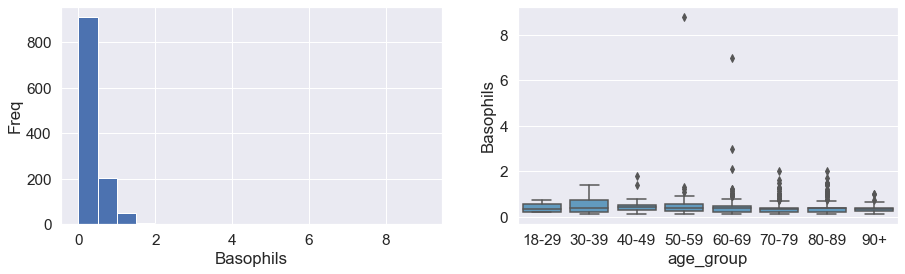

In [251]:
# Check that the Basophils distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.5
bins = np.arange(0,df_cleaned['Basophils'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Basophils', bins = bins)
plt.xlabel('Basophils')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Basophils", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in Lymphocyte`

Lets look at the distibution of Lymphocyte as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

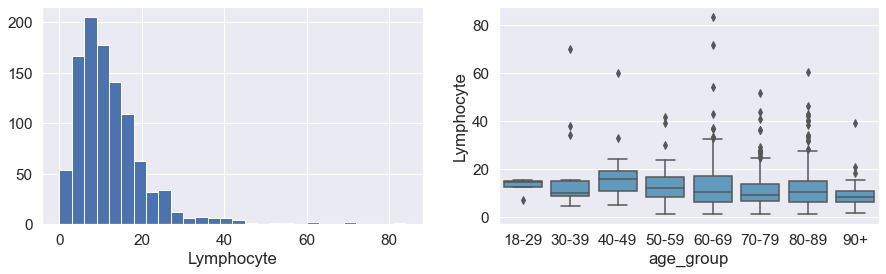

In [252]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 3
bins = np.arange(0,df_cleaned['Lymphocyte'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Lymphocyte', bins = bins)
plt.xlabel('Lymphocyte');

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Lymphocyte", data=df_cleaned, color = barcolor, order = age_order);

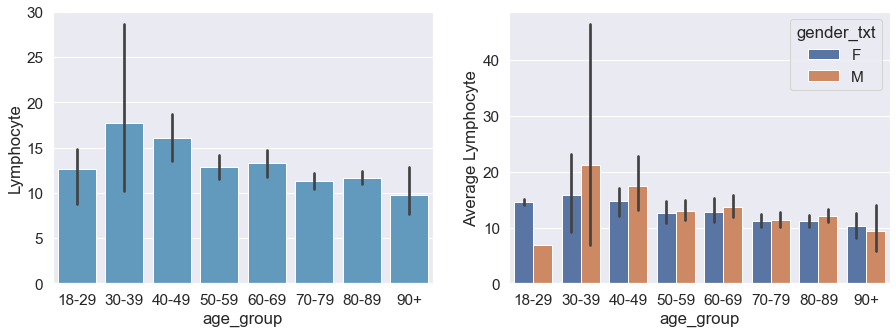

In [253]:
# View averages of Lymphocyte wrt to age-group and sex

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Lymphocyte", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Lymphocyte')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Lymphocyte", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Lymphocyte');

There is marked difference in the averages for each age_group between Females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [254]:
# fill nans in the Lymphocyte column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Lymphocyte')

In [255]:
# Check that there are no more nan values in the Lymphocyte column.
df_cleaned['Lymphocyte'].isna().sum()

0

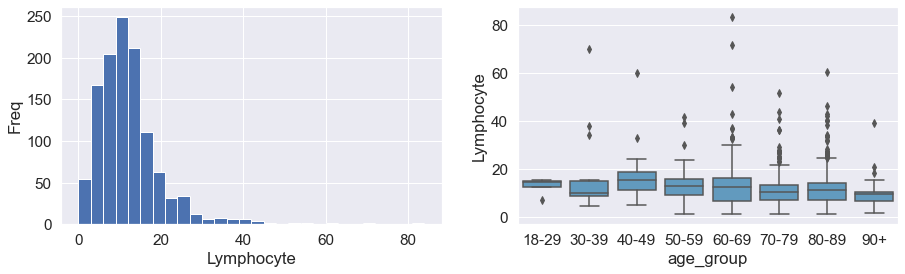

In [256]:
# Check that the Lymphocyte distibution is not significantly different from the pre-processed data
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 3
bins = np.arange(0,df_cleaned['Lymphocyte'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Lymphocyte', bins = bins)
plt.xlabel('Lymphocyte')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Lymphocyte", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in PT`

Lets look at the distribution of PT as a reference. 
We want to ensure that after adressing the nans the property distribution is similar to the original distribution

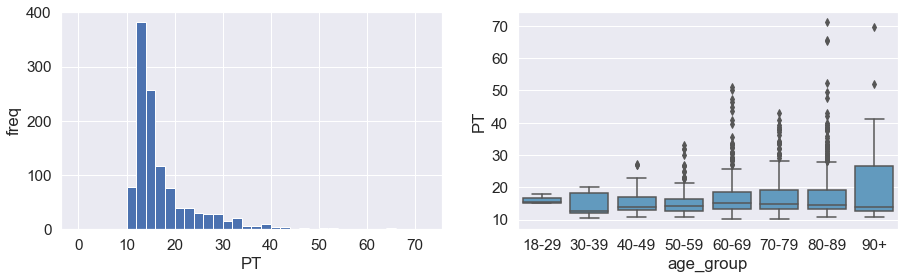

In [257]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 2
bins = np.arange(0,df_cleaned['PT'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'PT', bins = bins)
plt.xlabel('PT')
plt.ylabel('freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="PT", data=df_cleaned, color = barcolor, order = age_order);

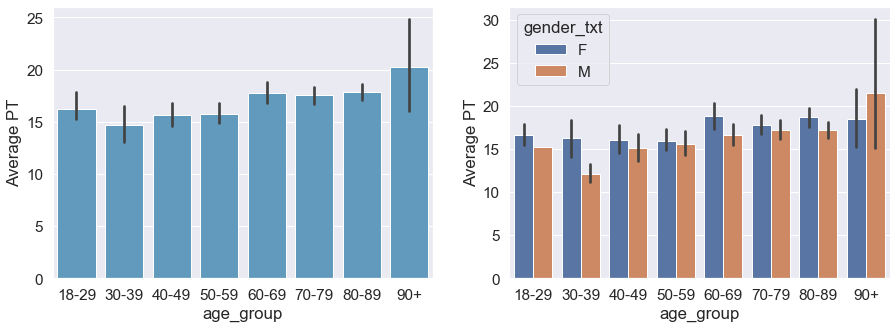

In [258]:
# View averages of PT wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="PT", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average PT')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="PT", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average PT');

There is marked difference in the averages for each age_group between Females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [259]:
# fill nans in the PT column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'PT')

In [260]:
# Check that there are no more nan values in the PT column.
df_cleaned['PT'].isna().sum()

0

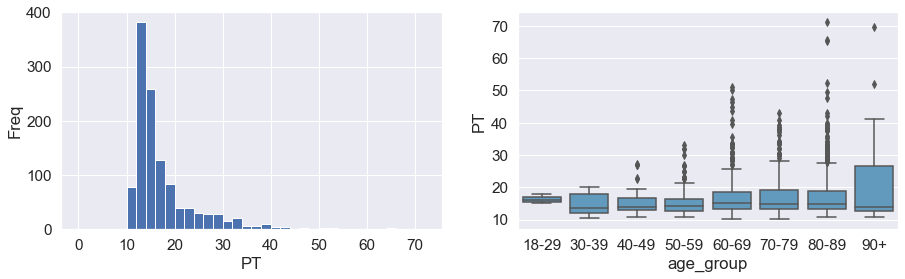

In [261]:
# Check that the PT distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 2
bins = np.arange(0,df_cleaned['PT'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'PT', bins = bins)
plt.xlabel('PT')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="PT", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in INR`

Lets look at the distibution of INR as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

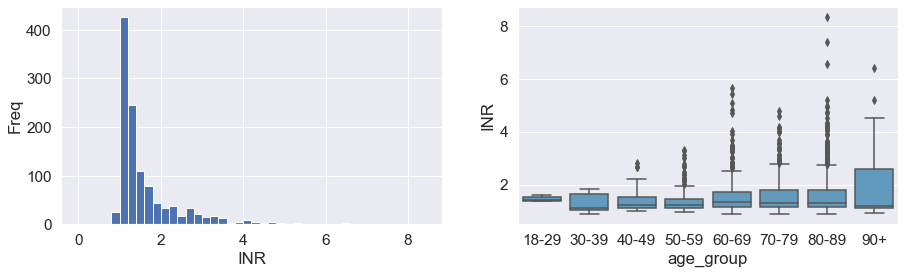

In [262]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.2
bins = np.arange(0,df_cleaned['INR'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'INR', bins = bins)
plt.xlabel('INR')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="INR", data=df_cleaned, color = barcolor, order = age_order);

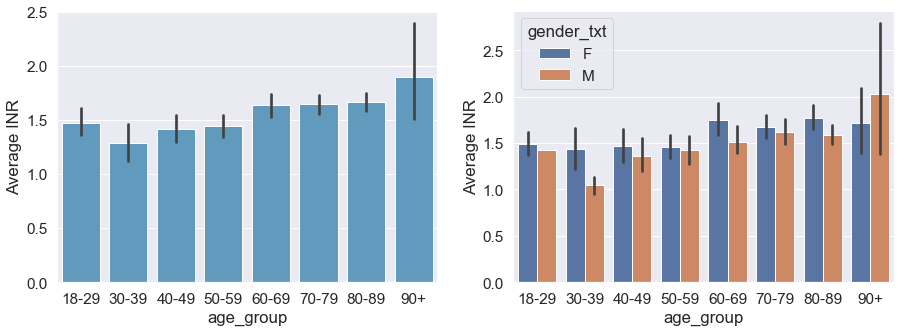

In [263]:
# View averages of INR wrt to age-group and sex
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="INR", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average INR')


plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="INR", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average INR');

There is marked difference in the averages for each age_group between females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [264]:
# fill nans in the INR rate column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'INR')

In [265]:
# Check that there are no more nan values in the INR column.
df_cleaned['INR'].isna().sum()

0

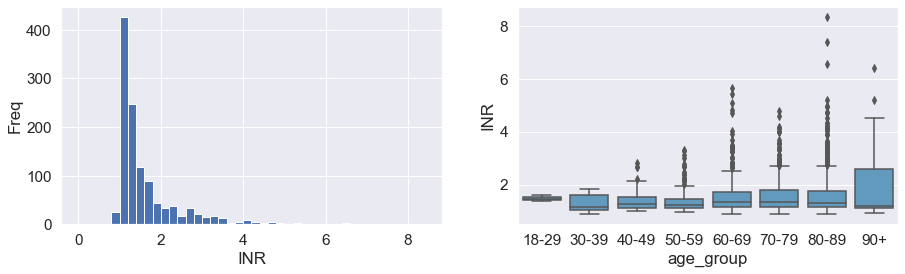

In [266]:
# Check that the INR distibution is not significantly different from the pre-processed data
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.2
bins = np.arange(0,df_cleaned['INR'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'INR', bins = bins)
plt.xlabel('INR')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="INR", data=df_cleaned, color = barcolor, order = age_order);


##### `Addressing nans in Creatine Kinase`

Lets look at the distibution of Creatine kinase as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

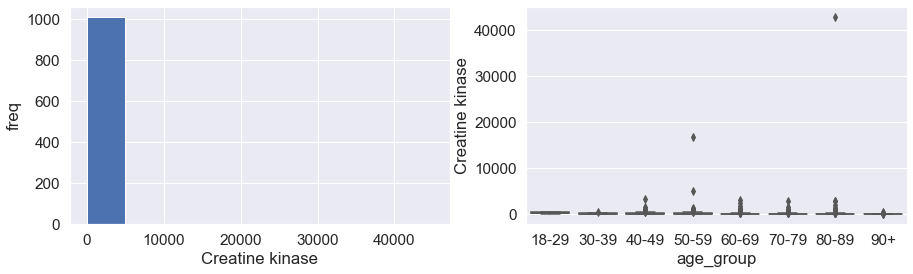

In [267]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 5000
bins = np.arange(0,df_cleaned['Creatine kinase'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Creatine kinase', bins = bins)
plt.xlabel('Creatine kinase')
plt.ylabel('freq');

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Creatine kinase", data=df_cleaned, color = barcolor, order = age_order);

the box plot above shows outlies greater than 10000 u/l

In [268]:
#lets look at these outliers
df_cleaned[df_cleaned['Creatine kinase'] > 10000]

group      ID  outcome  age  gender        BMI  hypertensive  \
524      1  174478      0.0   59       2  50.874275             1   
646      1  161407      1.0   83       2  30.655617             1   

     atrialfibrillation  CHD with no MI  diabetes  ...    Chloride  Anion gap  \
524                   0               0         1  ...  105.684211  14.142857   
646                   1               0         1  ...  104.823529  15.625000   

     Magnesium ion        PH  Bicarbonate  Lactic acid       PCO2  EF  \
524       1.935714  7.321429    26.071429     2.291667  47.285714  55   
646       2.094118  7.395000    23.875000     4.028571  35.428571  20   

     age_group  gender_txt  
524      50-59           M  
646      80-89           M  

[2 rows x 53 columns]

In [269]:
#we will set this outliers to nan and subsequently fill them up with averages
df_cleaned['Creatine kinase'] = df['Creatine kinase'].apply(lambda x: np.NaN if x > 10000 else x)

Creatine Kinase distribution after outlier removal

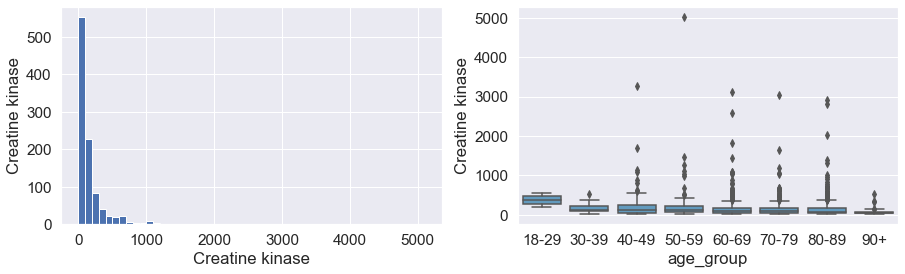

In [270]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 100
bins = np.arange(0,df_cleaned['Creatine kinase'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Creatine kinase', bins = bins)
plt.xlabel('Creatine kinase')
plt.ylabel('Creatine kinase')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Creatine kinase", data=df_cleaned, color = barcolor, order = age_order);

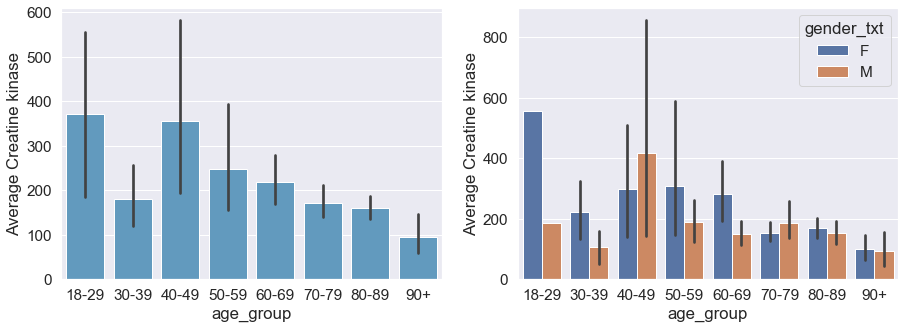

In [271]:
# View averages of Creatine kinase wrt to age-group and sex
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Creatine kinase", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average Creatine kinase')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Creatine kinase", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Creatine kinase');

There is marked difference in the averages for each age_group between Females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [272]:
# fill nans in the Creatine kinase column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Creatine kinase')

In [273]:
# Check that there are no more nan values in the Creatine kinase column.
df_cleaned['Creatine kinase'].isna().sum()

0

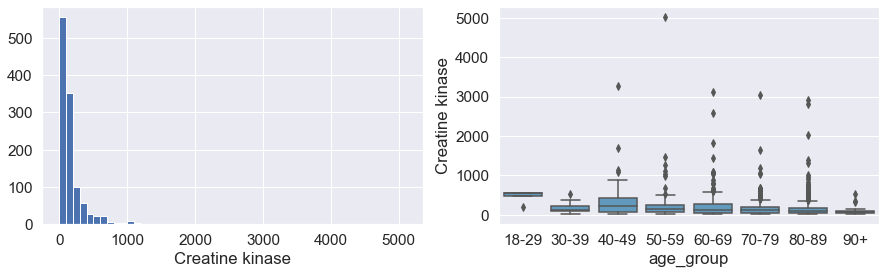

In [274]:
# Check that the Creatine kinase distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 100
bins = np.arange(0,df_cleaned['Creatine kinase'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Creatine kinase', bins = bins)
plt.xlabel('Creatine kinase')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Creatine kinase", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in glucose`

Lets look at the distibution of glucose as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

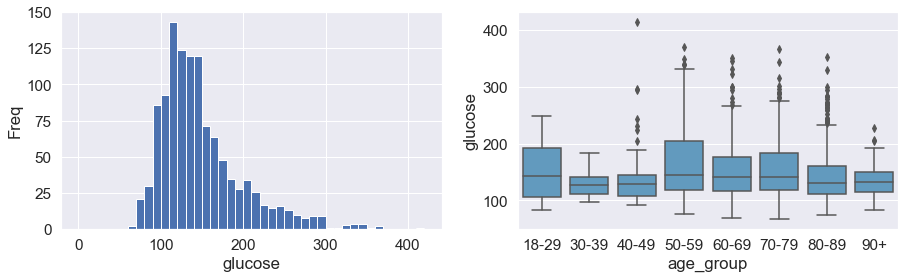

In [275]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 10
bins = np.arange(0,df_cleaned['glucose'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'glucose', bins = bins)
plt.xlabel('glucose')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="glucose", data=df_cleaned, color = barcolor, order = age_order);

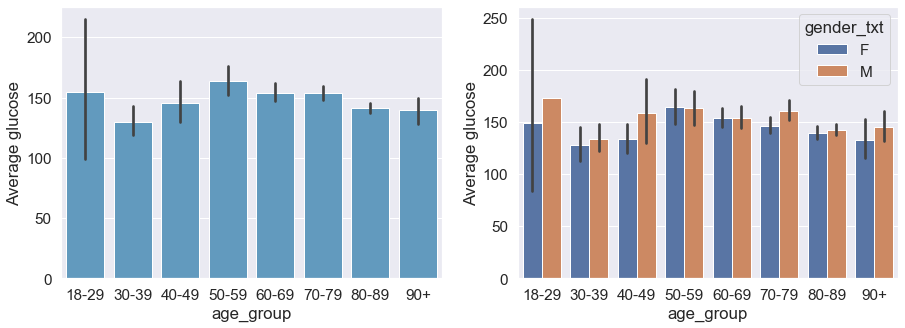

In [276]:
# View averages of glucose wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="glucose", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average glucose')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="glucose", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average glucose');

There is marked difference in the averages for each age_group between females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [277]:
# fill nans in the glucose column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'glucose')

In [278]:
# Check that there are no more nan values in the glucose column.
df_cleaned['glucose'].isna().sum()

0

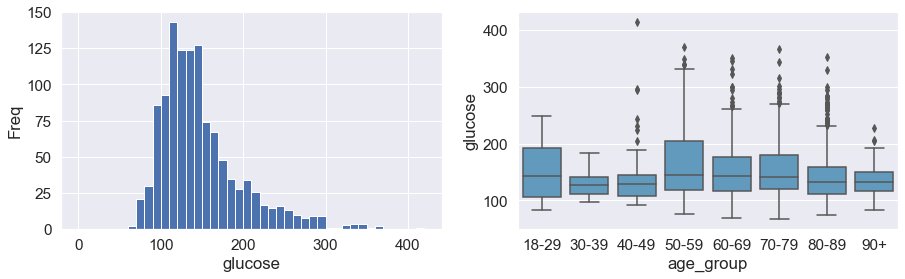

In [279]:
# Check that the glucose distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 10
bins = np.arange(0,df_cleaned['glucose'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'glucose', bins = bins)
plt.xlabel('glucose')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="glucose", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in Blood calcium`

Lets look at the distibution of Blood calcium as a reference. 
We want to ensure that after addressing the nans the property distribution is similar to the original distribution

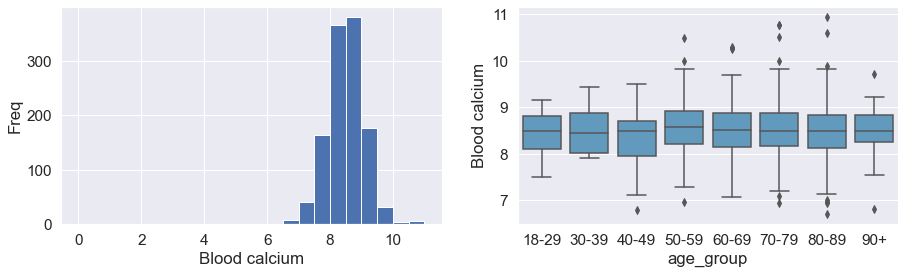

In [280]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.5
bins = np.arange(0,df_cleaned['Blood calcium'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Blood calcium', bins = bins)
plt.xlabel('Blood calcium')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Blood calcium", data=df_cleaned, color = barcolor, order = age_order);

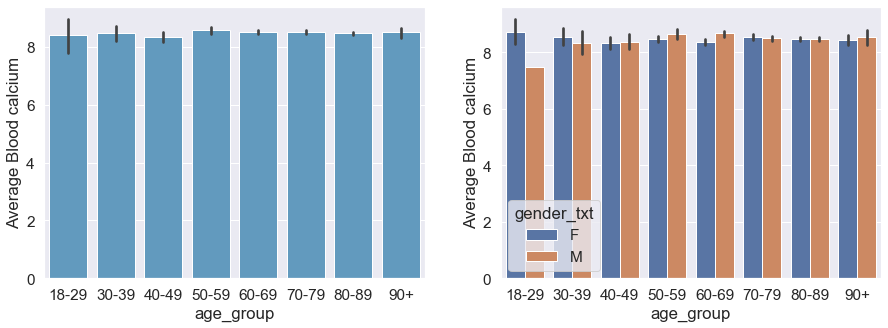

In [281]:
# View averages of Blood Calcium wrt to age-group and sex

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Blood calcium", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average Blood calcium')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Blood calcium", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Blood calcium');

There is marked difference in the averages for each age_group between Females and males thus we'll fill in the nans with the means with respect to age_group and gender.

In [282]:
# fill nans in the Blood calcium column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Blood calcium')

In [283]:
# Check that there are no more nan values in the Blood calcium column.
df_cleaned['Blood calcium'].isna().sum()

0

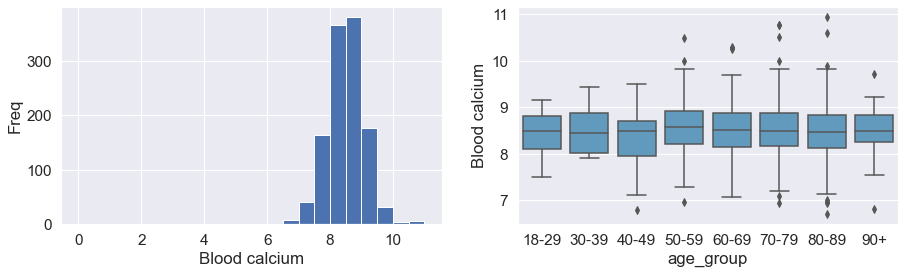

In [284]:
# Check that the Blood calcium distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.5
bins = np.arange(0,df_cleaned['Blood calcium'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Blood calcium', bins = bins)
plt.xlabel('Blood calcium')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Blood calcium", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in PH`

Lets look at the distibution of pH as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

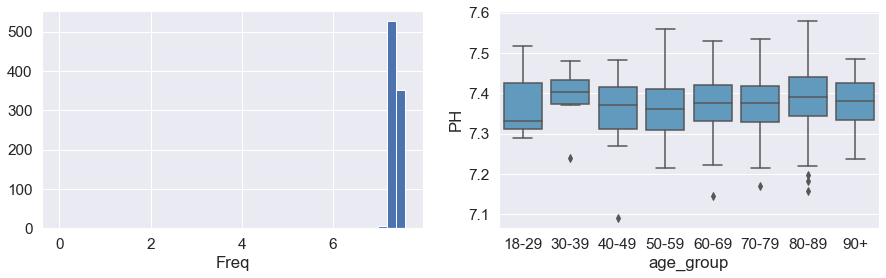

In [285]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.2
bins = np.arange(0,df_cleaned['PH'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'PH', bins = bins)
plt.xlabel('pH')
plt.xlabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="PH", data=df_cleaned, color = barcolor, order = age_order);

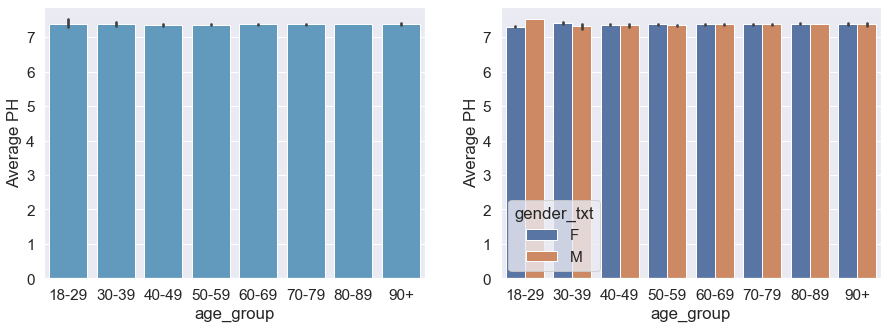

In [286]:
# View averages of PH wrt to age-group and sex

plt.figure(figsize=[15,5])


plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="PH", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average PH')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="PH", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average PH');

There is no marked difference in the averages between females and males  across the age_groups thus we'll fill in the nans with the means with respect to age_group.

In [287]:
# fill nans in the PH column
df_cleaned = fillna_wrt_age(df_cleaned, 'PH')

In [288]:
# Check that there are no more nan values in the PH column.
df_cleaned['PH'].isna().sum()

0

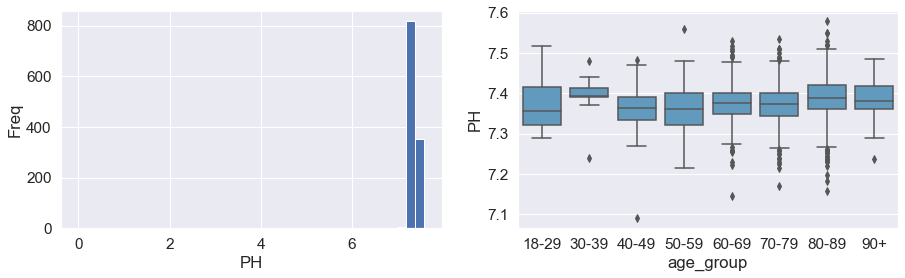

In [289]:
# Check that the PH distibution is not significantly different from the pre-processed PH

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.2
bins = np.arange(0,df_cleaned['PH'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'PH', bins = bins)
plt.xlabel('PH')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="PH", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in Lactic Acid`

Lets look at the distibution of Lactic Acid as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

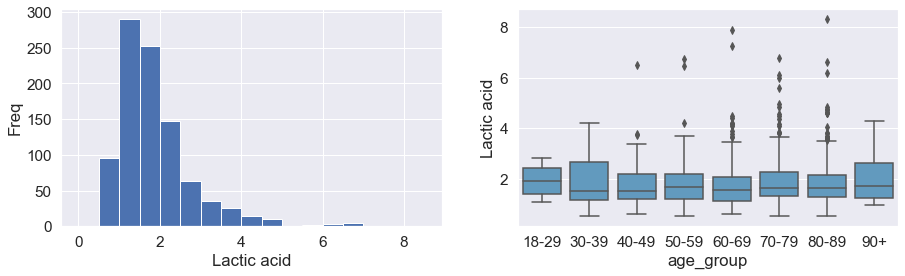

In [290]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.5
bins = np.arange(0,df_cleaned['Lactic acid'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Lactic acid', bins = bins)
plt.xlabel('Lactic acid')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Lactic acid", data=df_cleaned, color = barcolor, order = age_order);

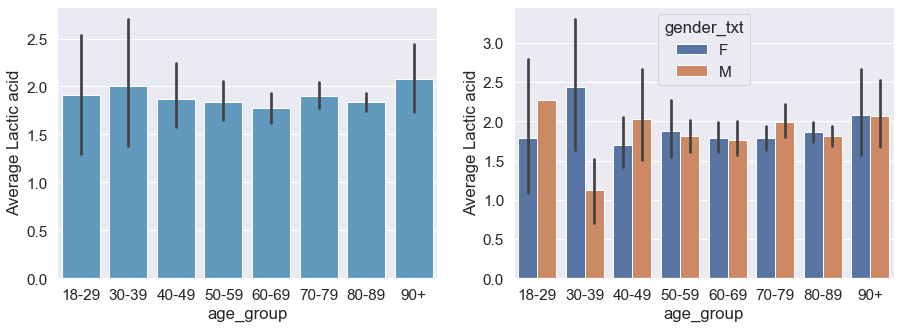

In [291]:
# View averages of Lactic acid wrt to age-group and sex
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="Lactic acid", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average Lactic acid')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="Lactic acid", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average Lactic acid');

There is marked difference in the averages for each age_group between females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [292]:
# fill nans in the Lactic acid column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'Lactic acid')

In [293]:
# Check that there are no more nan values in the Lactic acid column.
df_cleaned['Lactic acid'].isna().sum()

0

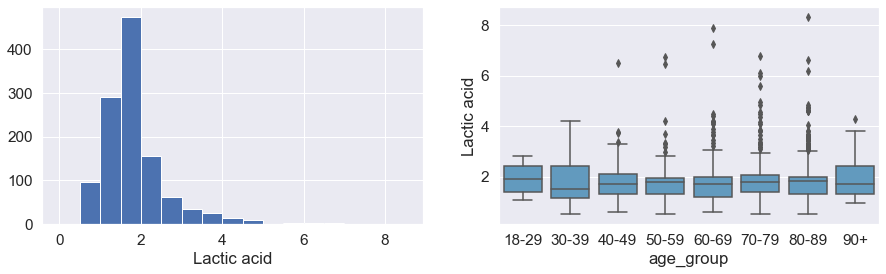

In [294]:
# Check that the Lactic acid distibution is not significantly different from the pre-processed data

fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 0.5
bins = np.arange(0,df_cleaned['Lactic acid'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'Lactic acid', bins = bins)
plt.xlabel('Lactic acid')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="Lactic acid", data=df_cleaned, color = barcolor, order = age_order);

##### `Addressing nans in PCO2`

Lets look at the distibution of PCO2 as a reference. 
We want to ensure that after adressing the nans the property dristribution is similar to the original distibution

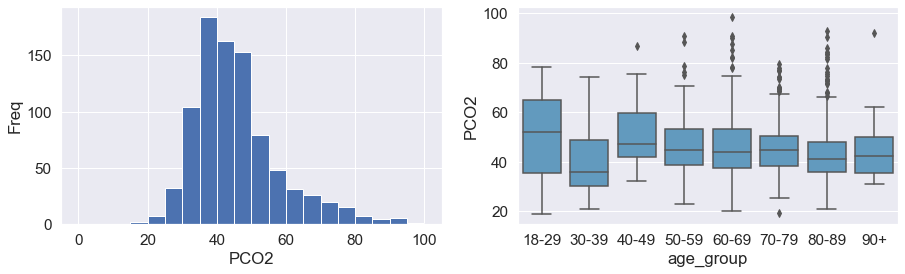

In [295]:
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 5
bins = np.arange(0,df_cleaned['PCO2'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'PCO2', bins = bins)
plt.xlabel('PCO2')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="PCO2", data=df_cleaned, color = barcolor, order = age_order);

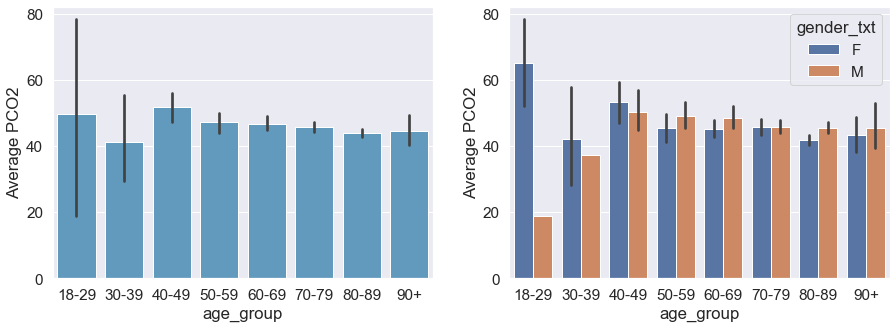

In [296]:
# View averages of PCO2 wrt to age-group and sex

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
ax = sb.barplot(x="age_group", y="PCO2", data=df_cleaned,color = barcolor, order = age_order)
plt.ylabel('Average PCO2')

plt.subplot(1,2,2)
ax = sb.barplot(x="age_group", y="PCO2", data=df_cleaned, hue = 'gender_txt', order = age_order)

plt.ylabel('Average PCO2');

There is marked difference in the averages for each age_group between Females and males thus we'll fill in the nans with the averages with respect to age_group and gender.

In [297]:
# fill nans in the PCO2 column
df_cleaned = fillna_wrt_age_n_gender(df_cleaned, 'PCO2')

In [298]:
# Check that there are no more nan values in the PCO2 column.
df_cleaned['PCO2'].isna().sum()

0

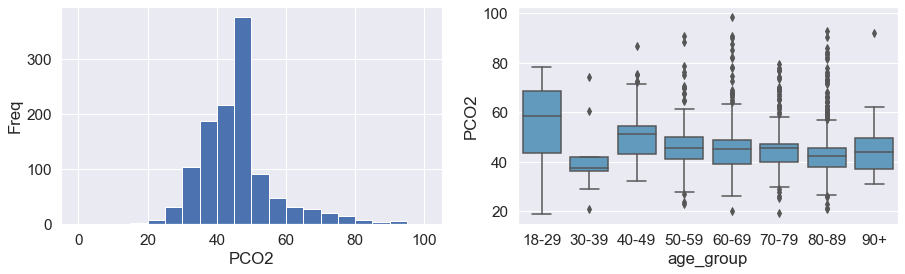

In [299]:
# Check that the PCO2 distibution is not significantly different from the pre-processed Data
fig = plt.figure(figsize = [15,4])

plt.subplot(1,2,1)
binsize = 5
bins = np.arange(0,df_cleaned['PCO2'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'PCO2', bins = bins)
plt.xlabel('PCO2')
plt.ylabel('Freq')

plt.subplot(1,2,2)
ax = sb.boxplot(x="age_group", y="PCO2", data=df_cleaned, color = barcolor, order = age_order);

In [300]:
# checks that there are no more nans in df_cleaned

In [301]:
# get count of null values in columns with nulls
df_null_count = df_cleaned.isna().sum().reset_index().rename(columns={0:'count'})
df_null_count.query('count > 0')

Empty DataFrame
Columns: [index, count]
Index: []

## 2. Exploratory Data Analysis <a id='ExploratoryDataAnalysis'></a>
<div style="text-align: right"
     
[TOC](#toc)

In [302]:
# list to hold column names of variable groups.

demo_vars = ['age', 'gender', 'BMI']

vital_sign_vars = ['heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
                   'Respiratory rate', 'temperature', 'SP O2','Urine output']

comorbidities_vars = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
                      'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD']

lab_vars = ['hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils',
            'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose',
            'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion',
            'PH', 'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']


## 2.1 Demographics <a id='DemographicData'></a>
<div style="text-align: right"
     
[TOC](#toc)

### 2.1.1 Split of gender in the dataset

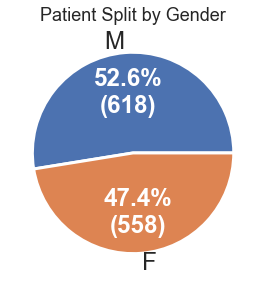

In [303]:
def my_fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)


values = pd.Series(df_cleaned['gender'])
v_counts = values.value_counts()
total = len(values)

fig, ax  = plt.subplots(figsize = (4,7))
patches, texts, pcts = ax.pie(v_counts, labels=['M', 'F'], autopct=my_fmt, 
       wedgeprops = {'linewidth': 3.0, 'edgecolor': 'white'},
       textprops = {'size': 'x-large'})

# style the percent values
plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('Patient Split by Gender', fontsize = 18)

plt.tight_layout();


<p style = "color: green"> Data suggests men are likely to get a HF than women </p>

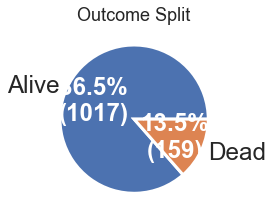

In [304]:
values = pd.Series(df_cleaned['outcome'])
v_counts = values.value_counts()
total = len(values)

fig, ax  = plt.subplots(figsize = (4,7))
patches, texts, pcts = ax.pie(v_counts,  labels=['Alive', 'Dead'], autopct=my_fmt, 
       wedgeprops = {'linewidth': 3.0, 'edgecolor': 'white'},
       textprops = {'size': 'x-large'})

# style the percent values
plt.setp(pcts, color = 'white', fontweight = 'bold')
ax.set_title('Outcome Split', fontsize = 18)

plt.tight_layout();


<font color='green'> 86% of the patients left the ICU alive, while 13.5% died.</font>

### 2.1.2 Age Distribtuion

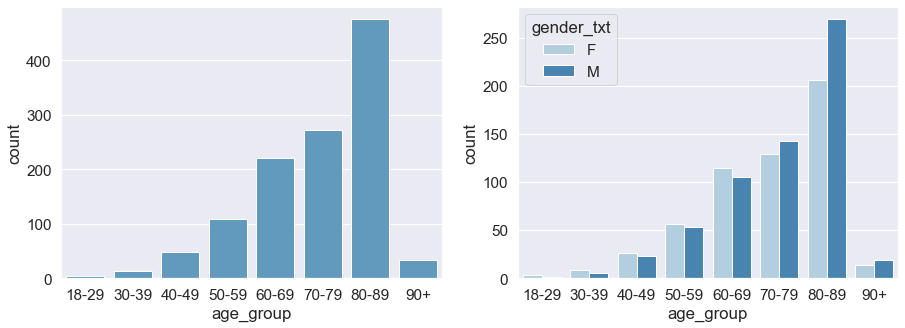

In [305]:
fig = plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
sb.countplot(data = df_cleaned, x = 'age_group', color = barcolor, order = age_order )

plt.subplot(1,2,2)
sb.countplot(data = df_cleaned, x = 'age_group', hue = 'gender_txt', 
             order = age_order, palette = 'Blues');


<p style = "color: green"> In general the risk of having a heart attack increases with age, and it is even more prevalent in Men </p>


### 2.1.3 BMI

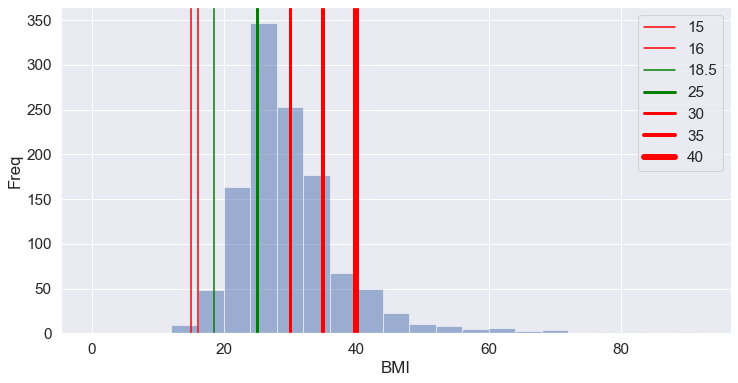

In [306]:
fig = plt.figure(figsize = [12,6])

binsize = 4
bins = np.arange(0,df_cleaned['BMI'].max() + binsize, binsize)
plt.hist(data = df_cleaned, x = 'BMI', bins = bins, alpha = 0.5)
y_min, y_max = plt.ylim()

plt.axvline(x=15, color = 'red', label='15')
plt.axvline(x=16, color = 'red', label='16')
plt.axvline(x=18.5, color = 'green', label='18.5')
plt.axvline(x=25, color = 'green', label='25', linewidth=3)
plt.axvline(x=30, color = 'red', label='30', linewidth=3)
plt.axvline(x=35, color = 'red', label='35', linewidth=4)
plt.axvline(x=40, color = 'red', label='40', linewidth=6)

plt.xlabel('BMI')
plt.legend()
plt.ylabel('Freq');


<p style = "color: green">From plot above, majority of the patients had a BMI above 25, which puts them in the overweight to obessed class. </p>

`BMI and age age_group`

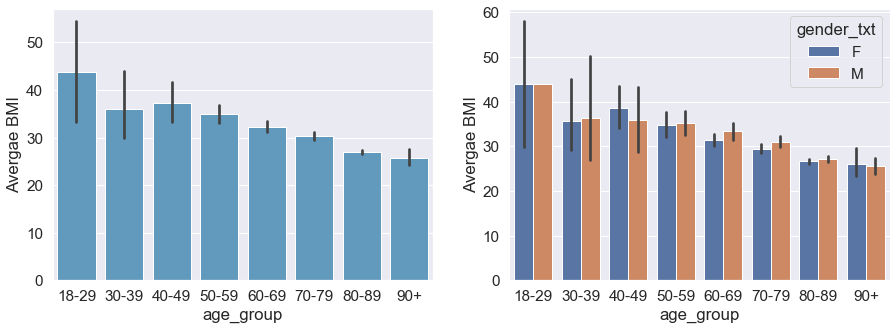

In [307]:
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
sb.barplot(x="age_group", y="BMI", data=df_cleaned, order = age_order, color = barcolor )
plt.ylabel('Avergae BMI')

plt.subplot(1,2,2)
sb.barplot(x="age_group", y="BMI", data=df_cleaned, hue = 'gender_txt', order = age_order )
plt.ylabel('Avergae BMI');

<p style = "color: green"> In general terms, data suggests a rise in BMI towards age 50 and there after a gradual decrease in BMI </p>

## 2.2 Comorbidities <a id='Comorbidities'></a>
<div style="text-align: right"
     
[TOC](#toc)



comorbidities_vars = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
                      'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD']

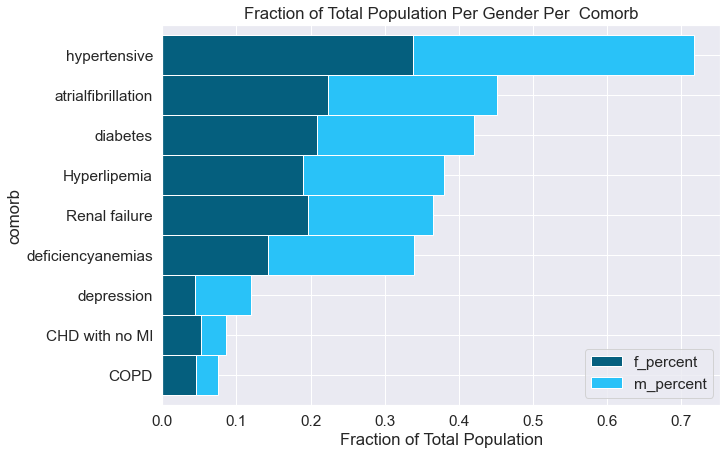

In [308]:
pd_dict = {'comorb':[], 'percent':[], 'f_percent':[],  'm_percent':[]}

for comorb in comorbidities_vars:
    pd_dict['comorb'].append(comorb)
    pd_dict['percent'].append(df_cleaned[comorb].sum()/df_cleaned.shape[0])
    pd_dict['f_percent'].append(df_cleaned[df_cleaned['gender_txt']== 'F'].groupby(comorb)['gender_txt'].count()[1]
                               /df_cleaned.shape[0])
    pd_dict['m_percent'].append(df_cleaned[df_cleaned['gender_txt']== 'M'].groupby(comorb)['gender_txt'].count()[1]
                               /df_cleaned.shape[0])

df_comob_percent = pd.DataFrame(pd_dict)
df_comob_percent = df_comob_percent.sort_values('percent', ascending = True)
df_comob_percent.set_index("comorb", inplace = True)
colors = ["#055F7E", "#29C2F8"]
ax = df_comob_percent.loc[:,['f_percent','m_percent']].plot.barh(stacked=True, color = colors, figsize=(10,7), width = 1)
ax.set_xlabel('Fraction of Total Population')
ax.set_title('Fraction of Total Population Per Gender Per  Comorb');


<p style = "color: green"> 70% of the sample size with HF were hypertensive. </p>

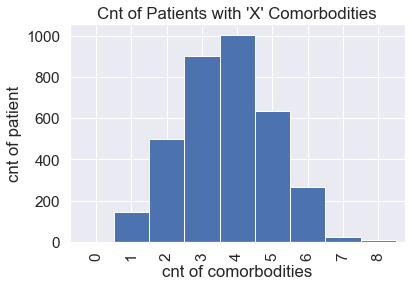

In [309]:
cormob_cnt_per_patient = df_cleaned[comorbidities_vars].sum(axis = 1).reset_index()
cormob_cnt_per_patient.rename(columns = {0: 'cntofcomorb'}, inplace = True)
cormob_cnt_per_patient
ax = cormob_cnt_per_patient.groupby(['cntofcomorb'])['cntofcomorb'].sum().plot(kind = 'bar', width = 1)
ax.set_ylabel('cnt of patient')
ax.set_xlabel('cnt of comorbodities')
ax.set_title('Cnt of Patients with \'X\' Comorbodities');

<p style = "color: green"> Over 70% of the sample size have between 2 - 5 cormobidities. </p>

In [310]:
def plt_comorb_cnt_age_sex(df, comorb):
    df_comorb = df.groupby(['age_group', 'gender_txt'])[comorb].sum().reset_index()
    df_comorb[comorb+ '_perc'] = df_comorb[comorb].apply(lambda x: x/df.shape[0])
    sb.barplot(x="age_group", y= comorb + "_perc", data=df_comorb, hue = 'gender_txt', order = age_order )
    plt.ylabel(comorb + '_perc');


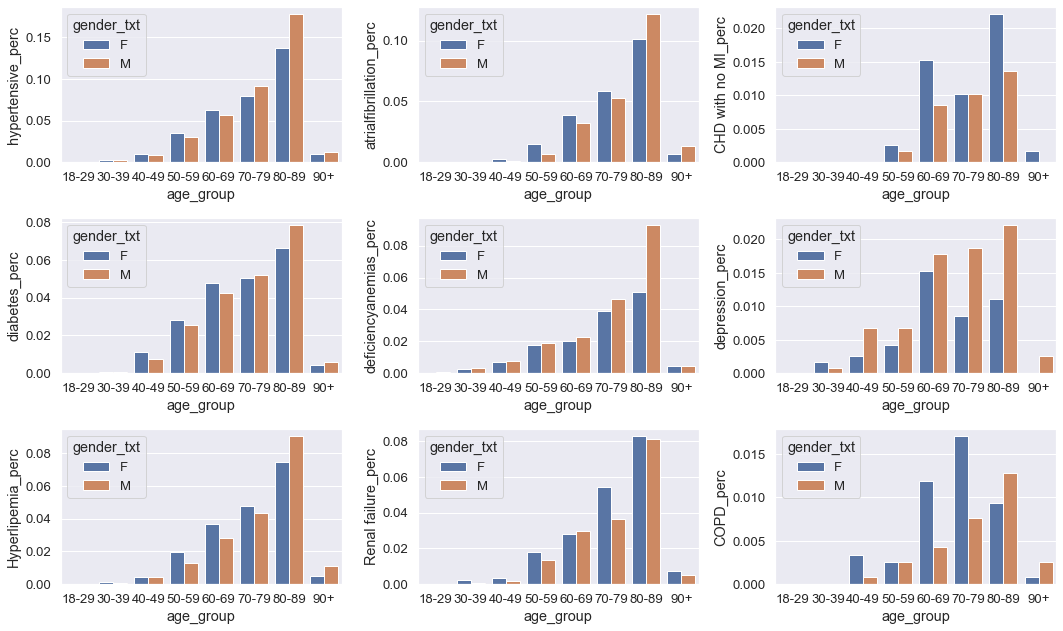

In [311]:
fig = plt.figure(figsize = [15,9])
sb.set(font_scale=1.2)
for i in range(len(comorbidities_vars)):
    plt.subplot(3,3,i+1)
    #plt.plot(df.index, df[col], label=col)
    #plt.xticks(df.index)
    #plt.legend(loc='upper left')   
    plt_comorb_cnt_age_sex(df_cleaned, comorbidities_vars[i])

fig.tight_layout()

<p style = "color: green"> In general, the risk of getting a comorbidity increases with age, with men being more at risk.</p>

## 2.3 Vital Signs <a id='VitalSigns'></a>
<div style="text-align: right"
     
[TOC](#toc)



vital_sign_vars = ['heart rate', 'Systolic blood pressure', 'Diastolic blood pressure',
                   'Respiratory rate', 'temperature', 'SP O2','Urine output']

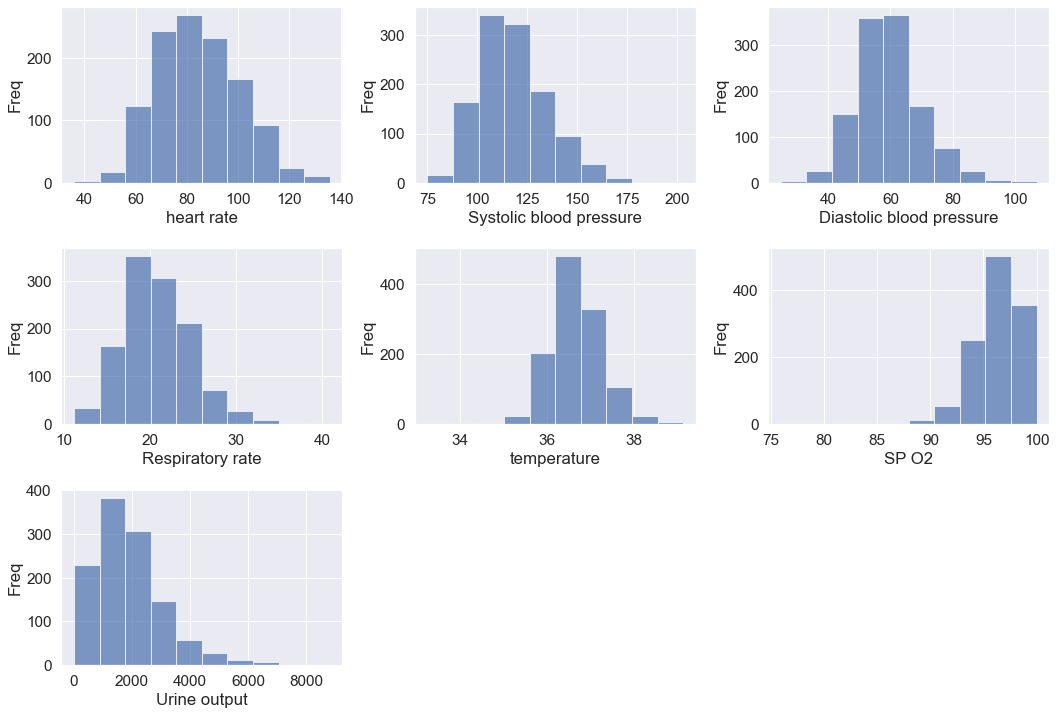

In [312]:
fig = plt.figure(figsize = [15,13])
sb.set(font_scale=1.4)
for i in range(len(vital_sign_vars)):
    plt.subplot(4,3,i+1)
    plt.hist(data = df_cleaned, x = vital_sign_vars[i], alpha = 0.7)
    plt.xlabel(vital_sign_vars[i])
    #plt.legend()
    plt.ylabel('Freq');
    
fig.tight_layout()

<p style = "color: green"> Urine output is right-skewed and SP 02 is left skewed. </p>

## 2.4 Laboratory variables <a id='LaboratoryVariables'></a>
<div style="text-align: right"
     
[TOC](#toc)



lab_vars = ['hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils',
            'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose',
            'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion',
            'PH', 'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']
            

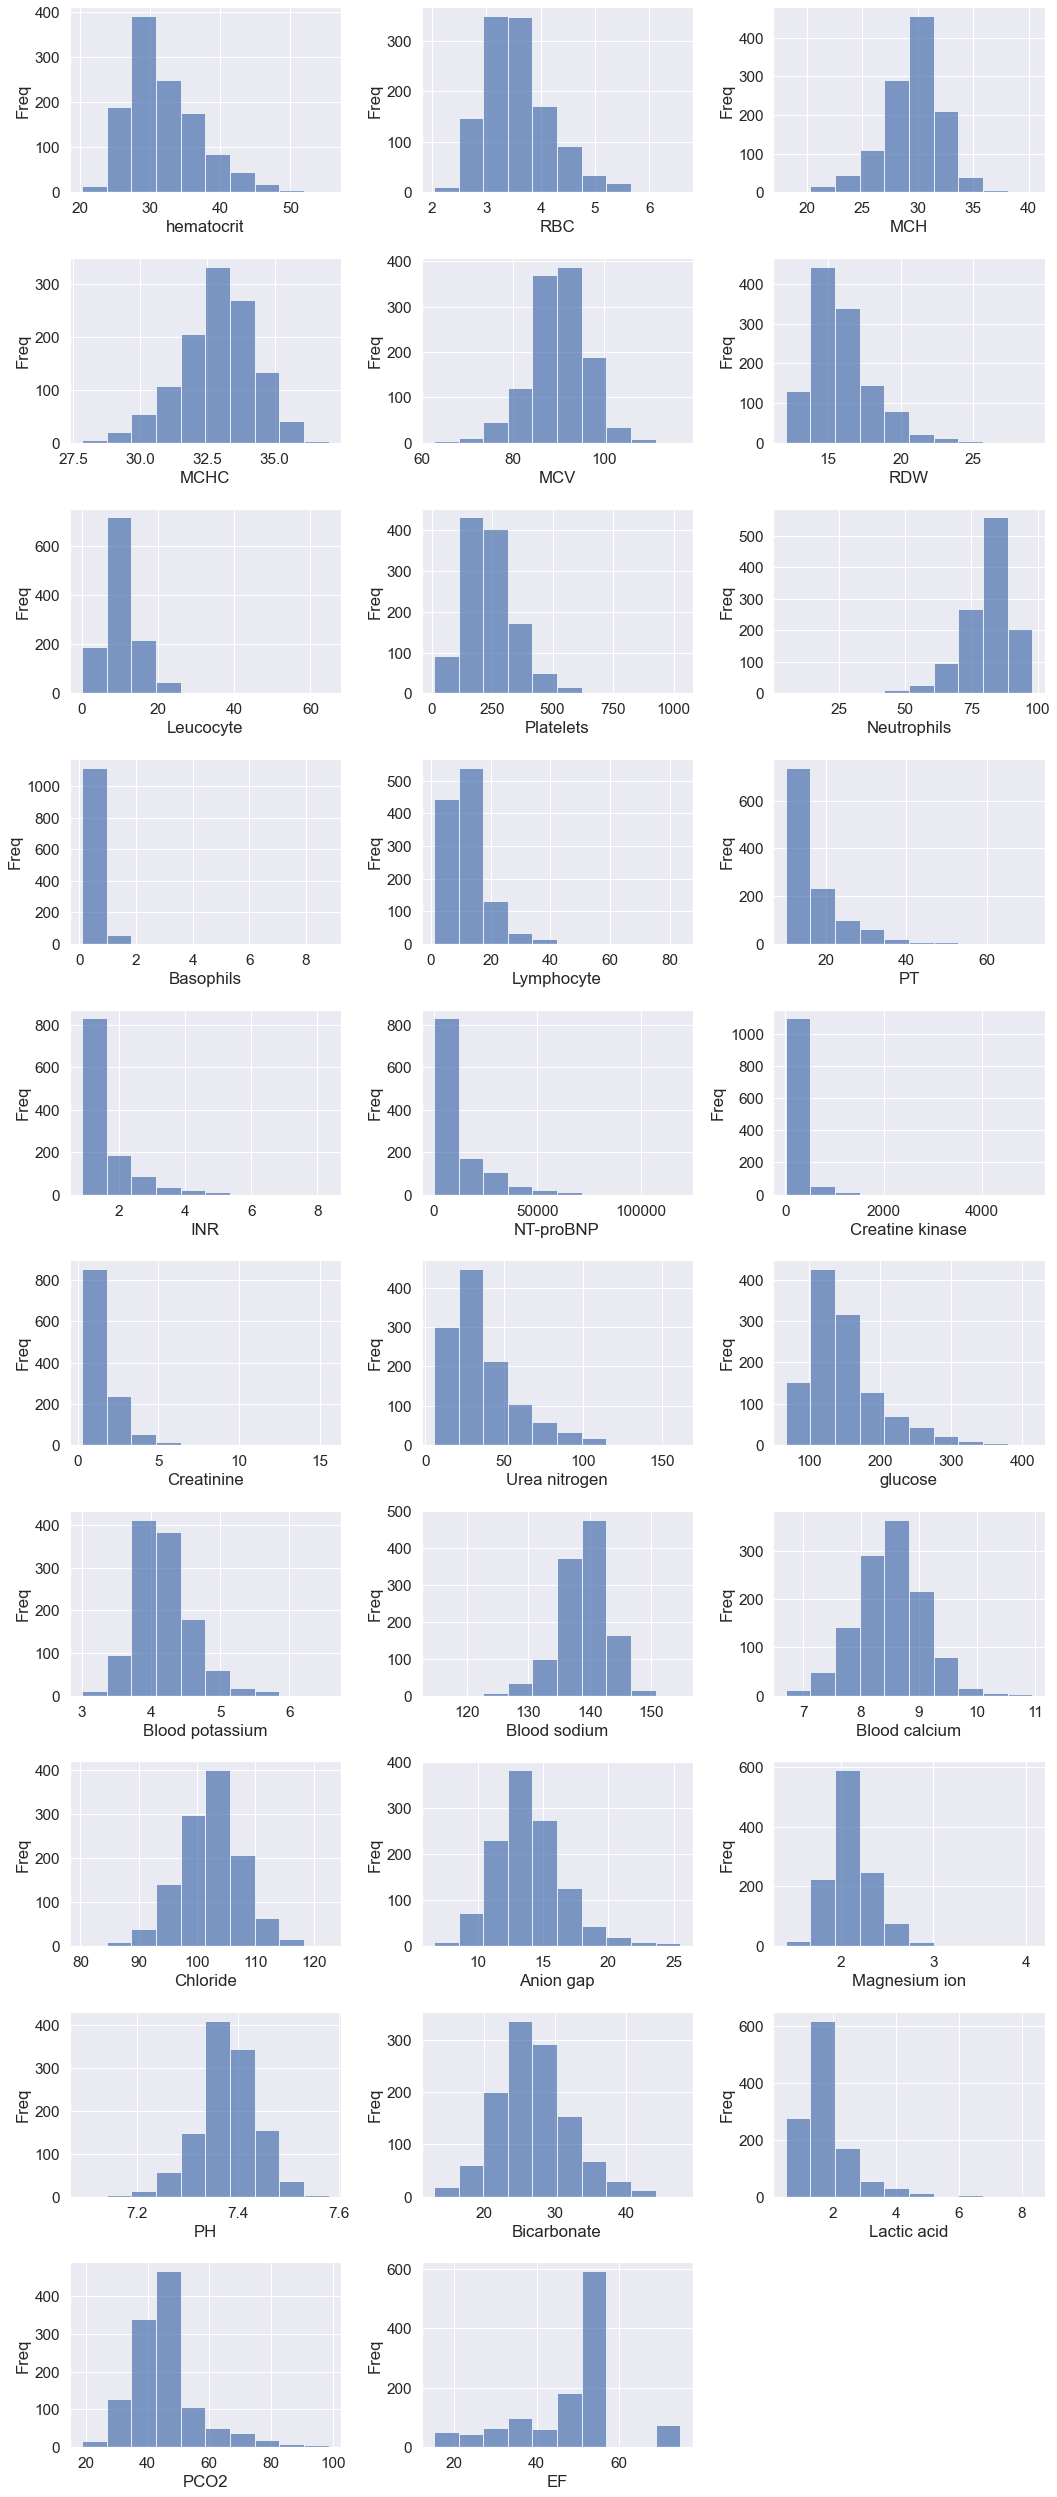

In [313]:
fig = plt.figure(figsize = [15,35])

for i in range(len(lab_vars)):
    plt.subplot(10,3,i+1)
    plt.hist(data = df_cleaned, x = lab_vars[i], alpha = 0.7)
    plt.xlabel(lab_vars[i])
    #plt.legend()
    plt.ylabel('Freq');
    
fig.tight_layout()

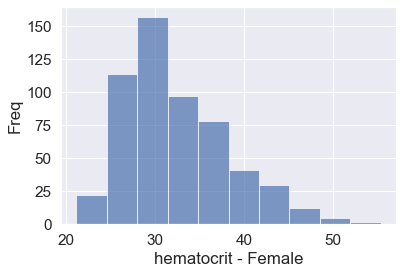

In [314]:
df_cleaned[df_cleaned['gender_txt'] == 'F']['hematocrit'].plot.hist(alpha = 0.7)
plt.xlabel('hematocrit - Female')
#plt.legend()
plt.ylabel('Freq');

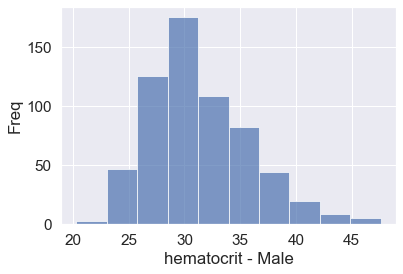

In [315]:
df_cleaned[df_cleaned['gender_txt'] == 'M']['hematocrit'].plot.hist(alpha = 0.7)
plt.xlabel('hematocrit - Male')
#plt.legend()
plt.ylabel('Freq');

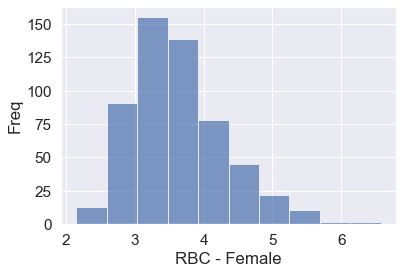

In [316]:
df_cleaned[df_cleaned['gender_txt'] == 'F']['RBC'].plot.hist(alpha = 0.7)
plt.xlabel('RBC - Female')
#plt.legend()
plt.ylabel('Freq');

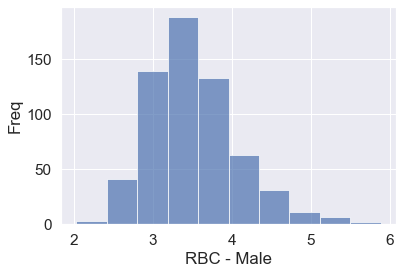

In [317]:
df_cleaned[df_cleaned['gender_txt'] == 'M']['RBC'].plot.hist(alpha = 0.7)
plt.xlabel('RBC - Male')
#plt.legend()
plt.ylabel('Freq');

## 2.5 Correlations and Interdependencies <a id='CorrAndInterDep'></a>
<div style="text-align: right"
     
[TOC](#toc)

Utility Functions

In [318]:
# Function to generate heatmap of correlation matrix between selected columns. 
# Credit: julianstanley (https://stackoverflow.com/questions/45487145/pandas-correlation-between-list-of-columns-x-whole-dataframe)

#Generate a correlation matrix for use to plot a heat map

def gen_corr_matrix(df, v_cols, h_cols):    
    #Create a new dictionary
    plotDict = {}
    # Loop across each of the two lists that contain the items you want to compare
    for gene1 in v_cols:
        for gene2 in h_cols:
            # Do a pearsonR comparison between the two items you want to compare
            tempDict = {(gene1, gene2): scipy.stats.pearsonr(df[gene1],df[gene2])}
            # Update the dictionary each time you do a comparison
            plotDict.update(tempDict)
    # Unstack the dictionary into a DataFrame
    dfOutput = pd.Series(plotDict).unstack()
    # Optional: Take just the pearsonR value out of the output tuple
    dfOutputPearson = dfOutput.apply(lambda x: x.apply(lambda x:x[0]))
    return dfOutputPearson
    



In [319]:
def heatmap_full(df_corr, map_title, annot, x, y):
    fig, ax = plt.subplots(figsize=(x, y))
    # mask
    #mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    # adjust mask and df

    #mask = mask[1:, :-1]
    corr = df_corr.copy()

    # color map

    #cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    cmap = 'coolwarm'
    
    # plot heatmap
    sb.heatmap(corr, annot=annot, fmt=".2f", 
               linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": .8}, square=True)
    
    
    #Code to limit what is labelled on the heatmap to above a certain threshold
    for t in ax.texts:
        if np.abs(float(t.get_text()))>=0.05:
            t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
        else:
            t.set_text("") # if not it sets an empty text

        
    ax.set(facecolor = 'white')
    
    # ticks
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)

    # title
    title = map_title
    plt.title(title, loc='left', fontsize=20)
    
    fig.tight_layout()
    plt.show()

In [320]:
def heatmap_lower_triangle_only(df_corr, map_title, annot, x, y):
    fig, ax = plt.subplots(figsize=(x, y))
    # mask
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    # adjust mask and df

    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()

    #mask = mask[0:, :]
    #corr = df_corr.iloc[0:,:].copy()

    
    # color map

    #cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    cmap = 'coolwarm'

    # plot heatmap
    sb.heatmap(corr, mask=mask, annot=annot, fmt=".2f", 
               linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": .8}, square=True)
    
    
    #Code to limit what is labelled on the heatmap to above a certain threshold
    for t in ax.texts:
        if np.abs(float(t.get_text()))>=0.05:
            t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
        else:
            t.set_text("") # if not it sets an empty text
    ax.set(facecolor = 'white')
    
    # ticks
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)

    # title
    title = map_title
    plt.title(title, loc='left', fontsize=20)
    fig.tight_layout()
    plt.show()

### 2.5.1 Feature Group A vs Feature Group A <a id='ParamAvsParamA'></a>
<div style="text-align: right"
     
[TOC](#toc)

#### 2.5.1.1 Vital Signs vs Vital Signs

In the heatmaps, the correlation numbers are only shown is they are greater than +/-0.05

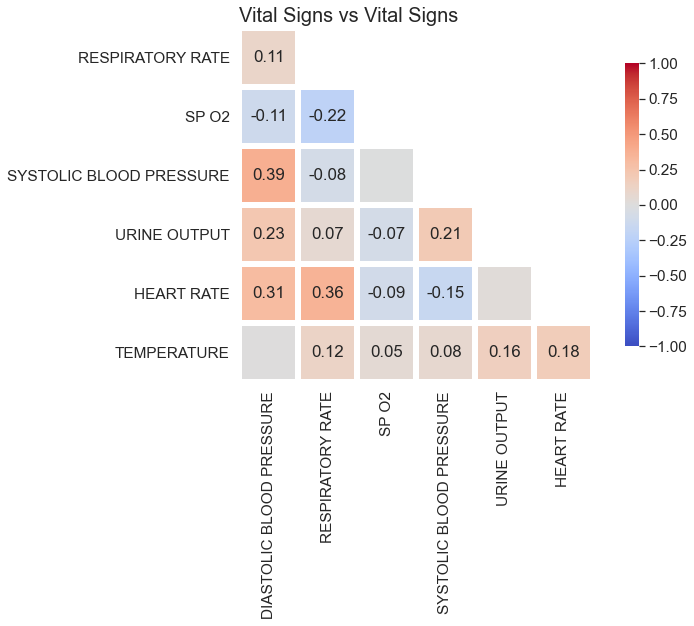

In [321]:
sb.set(font_scale = 1.4)
df_corr = gen_corr_matrix(df_cleaned, vital_sign_vars, vital_sign_vars)
heatmap_lower_triangle_only(df_corr, 'Vital Signs vs Vital Signs', True, 12, 9)

<p style = "color: green"> 2 of the most outstanding correlations are Systolic BP vs Diastolic BP and Heart rate vs Respiratory rate </p>

#### 2.5.1.2 Comorbidities vs Comorbidities

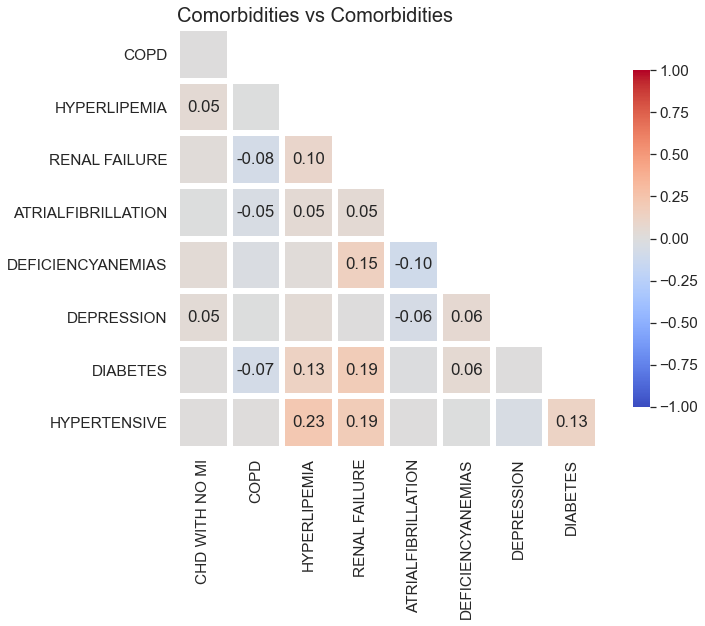

In [322]:

df_corr = gen_corr_matrix(df_cleaned, comorbidities_vars, comorbidities_vars)
heatmap_lower_triangle_only(df_corr, 'Comorbidities vs Comorbidities', True, 12, 9)

<p style = "color: green"> 2 of the most outstanding correlations are hyperlipemia vs hypertensive and renal failure vs hypertensive and diabetes.</p>

#### 2.5.1.2 Lab variables vs Lab variables

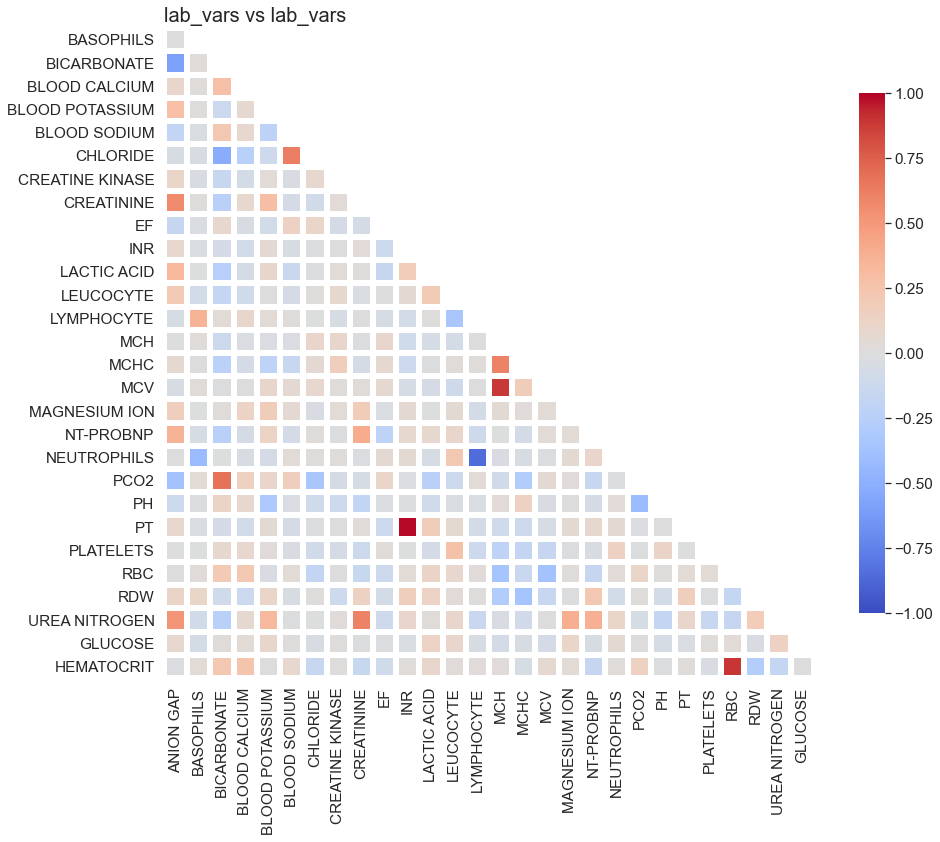

In [323]:

df_corr = gen_corr_matrix(df_cleaned, lab_vars, lab_vars)
heatmap_lower_triangle_only(df_corr, 'lab_vars vs lab_vars', False, 15, 12)


This is a huge heatmap. showing the correlation numbers would make it unpresenatable, thus the correlation numbers are not shown

<p style = "color: green">The heatmap shows strong correlation between hematocrit vs RBC and PT vs INR and MCV vs MCH, etc </p>

### 2.5.2 Param group A vs Param group B <a id='ParamAvsParamB'></a>
<div style="text-align: right"
     
[TOC](#toc)

#### 2.5.2.1 Comorbidities vs Demographics

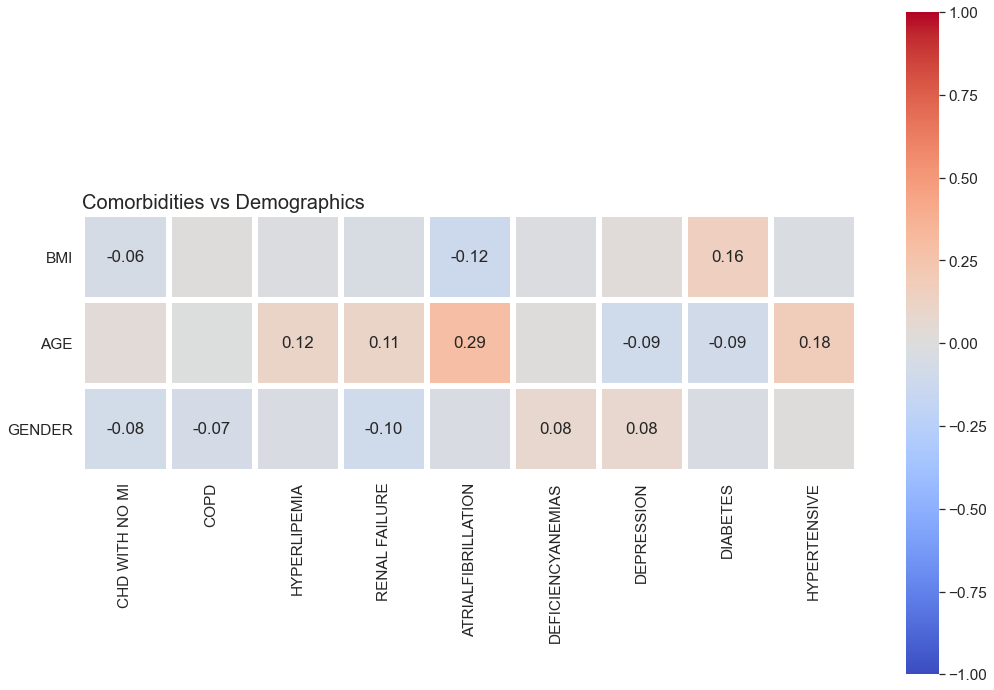

In [324]:
df_corr = gen_corr_matrix(df_cleaned, demo_vars, comorbidities_vars)
heatmap_full(df_corr, 'Comorbidities vs Demographics', True, 15, 12)

<p style = "color: green">Some of the strong correlations on the plot above include age vs atrial fibrillation, hypertension, renal failure and hyperlipemia. 
BMI vs diabetes is also another strong correlation.
</p>

#### 2.5.2.2 Vital signs vs Demographics

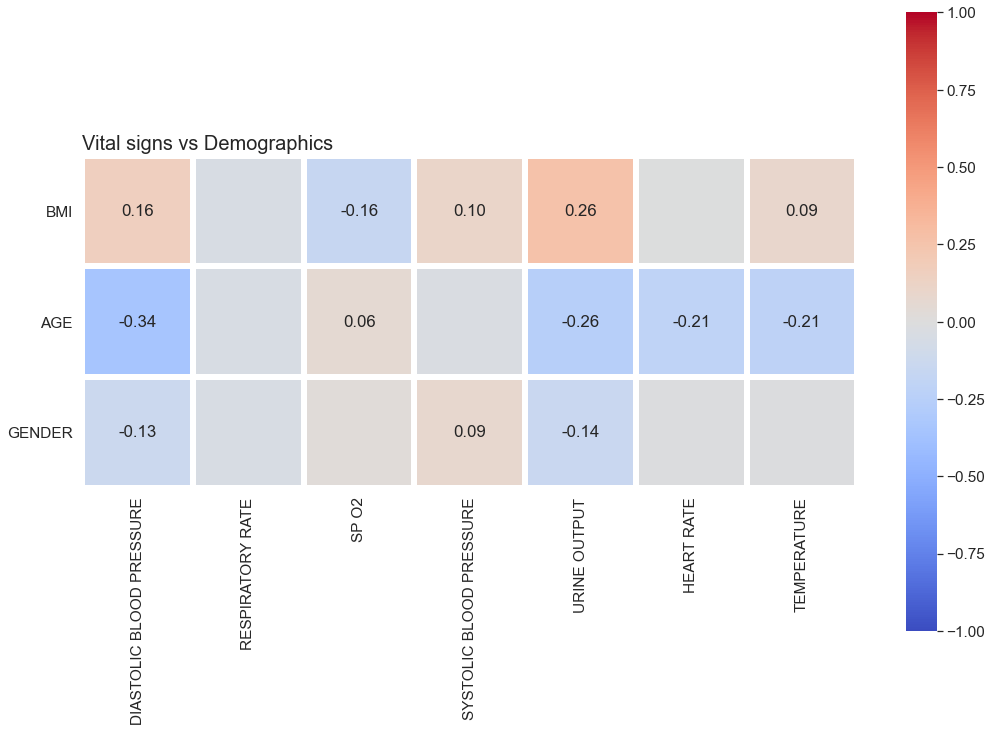

In [325]:
df_corr = gen_corr_matrix(df_cleaned, demo_vars, vital_sign_vars)
heatmap_full(df_corr, 'Vital signs vs Demographics', True, 15, 12)

<p style = "color: green">Some of the strong correlations on the plot above include age vs atrial fibrillation, hypertensiv vs age and hyperlipemia vs age.</p>

#### 2.5.2.3 Lab variables vs Demographics

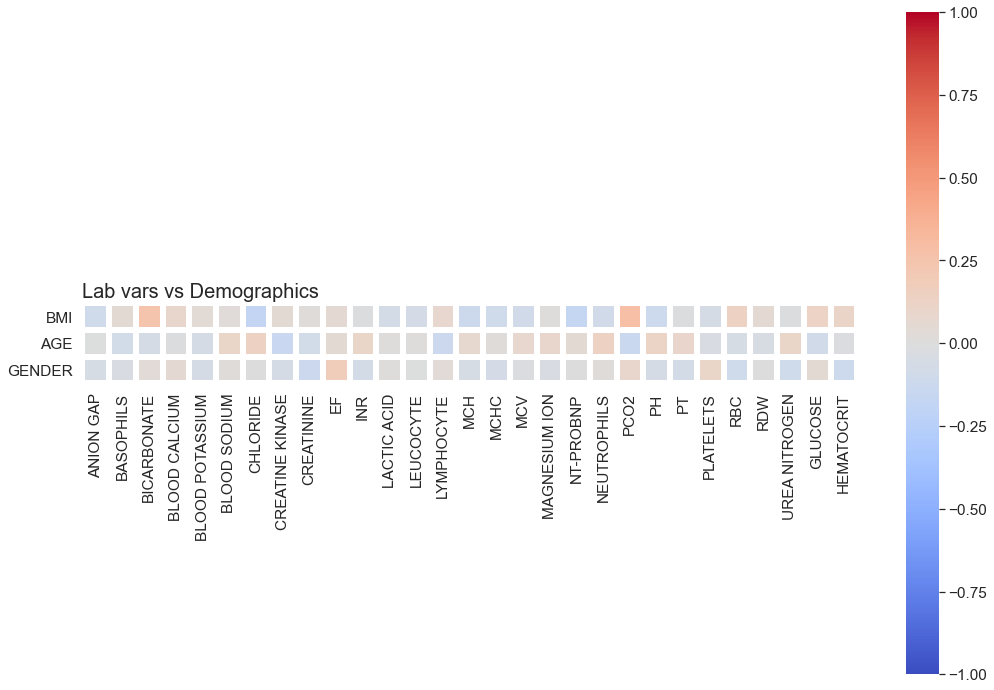

In [326]:
df_corr = gen_corr_matrix(df_cleaned, demo_vars, lab_vars)
heatmap_full(df_corr, 'Lab vars vs Demographics', False, 15, 12)



<p style = "color: green" >This is another large heatmap. some of the strong correlations include BMI vs PC02 and BMI vs Bicarbonate </p>

#### 2.5.2.4 Lab variables vs Demographics

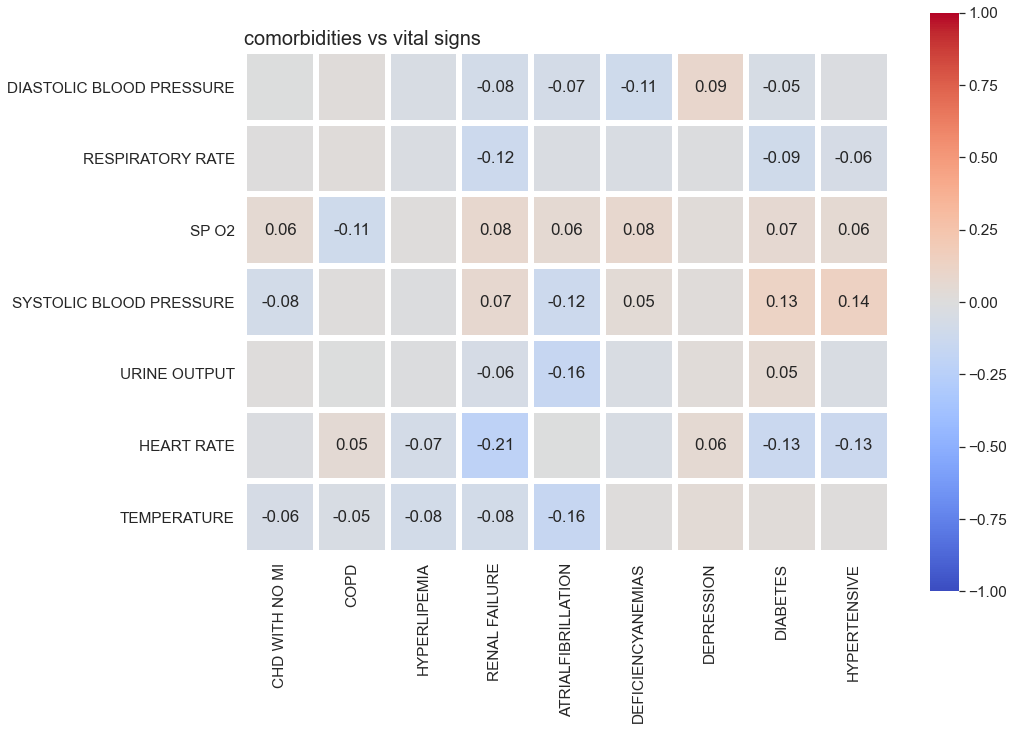

In [327]:
df_corr = gen_corr_matrix(df_cleaned, vital_sign_vars, comorbidities_vars )
heatmap_full(df_corr, 'comorbidities vs vital signs', True, 15, 12)

<p style = "color: green" >Strong correlations from the plot above includes systolic blood pressure vs hypertensive vs systolic blood pressure vs diabetes </p>

#### 2.5.2.4 Lab variables vs Demographics

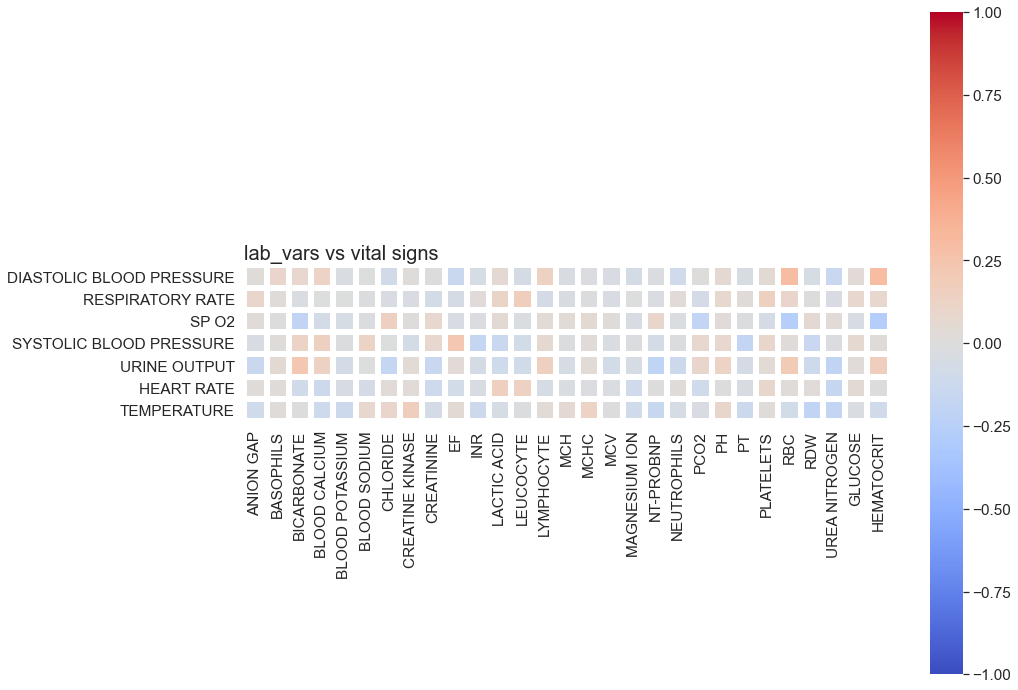

In [328]:
df_corr = gen_corr_matrix(df_cleaned, vital_sign_vars, lab_vars )
heatmap_full(df_corr, 'lab_vars vs vital signs', False, 15, 12)

<p style = "color: green" >Strong correlations from the plot above includes diastolic blood pressure vs RBC and diastolic blood pressure vs hematocrit. </p>

#### 2.5.2.4 Lab variables vs vital signs

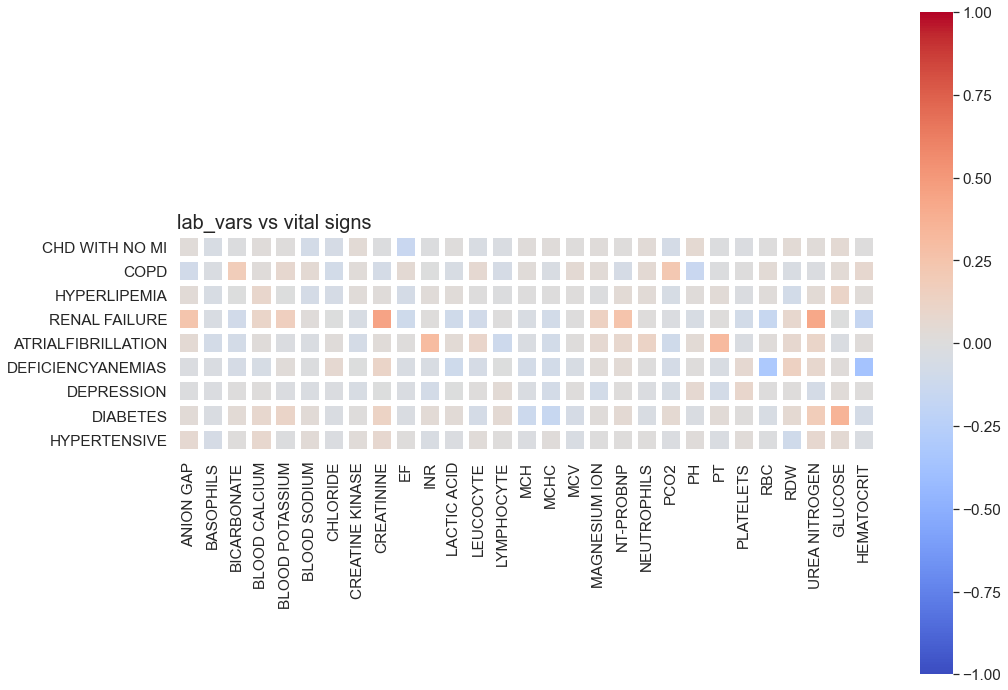

In [329]:
df_corr = gen_corr_matrix(df_cleaned, comorbidities_vars, lab_vars )
heatmap_full(df_corr, 'lab_vars vs vital signs', False, 15, 12)

<p style = "color: green" >Strong correlations from the plot above includes Renal Failure vs Creatinine and Renal Failure vs Urea Nitrogen </p>

### 2.5.3 Feature Group Vs Outcome <a id='ParamvsOutcome'></a>
<div style="text-align: right"
     
[TOC](#toc)

#### 2.5.2.5 Demographics vs Outcome

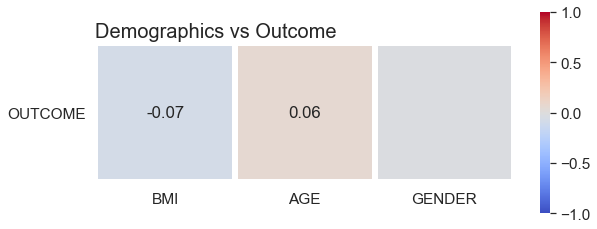

In [330]:
df_corr = gen_corr_matrix(df_cleaned, ['outcome'], demo_vars  )
heatmap_full(df_corr, 'Demographics vs Outcome', True, 9, 4)

<p style = "color: green" >from above correlation heatmap, Age and BMI impact outcome.</p>

#### 2.5.2.6 VitalSigns vs Outcome

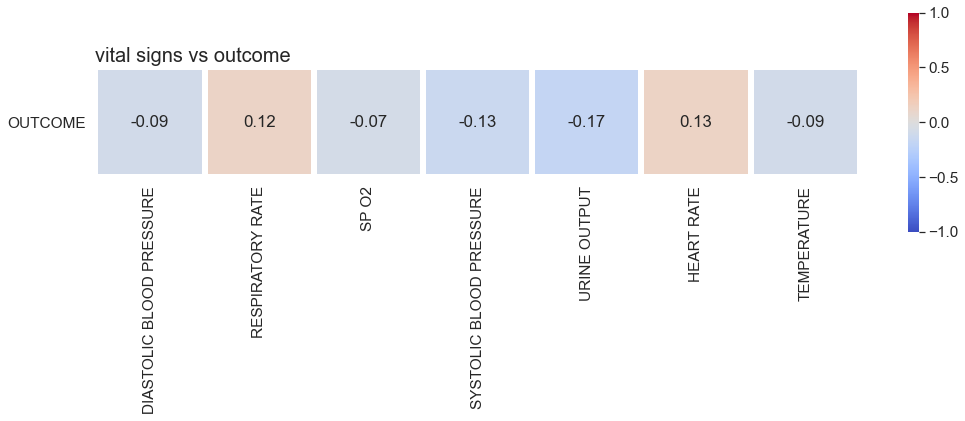

In [331]:
df_corr = gen_corr_matrix(df_cleaned, ['outcome'], vital_sign_vars  )
heatmap_full(df_corr, 'vital signs vs outcome', True, 15, 6)

<p style = "color: green" >Respiratory Rate and Heart Rate impacts the outcome. Urine output and systolic pressure also does impact outcome.</p>

#### 2.5.2.7 Comorbidities vs Outcome

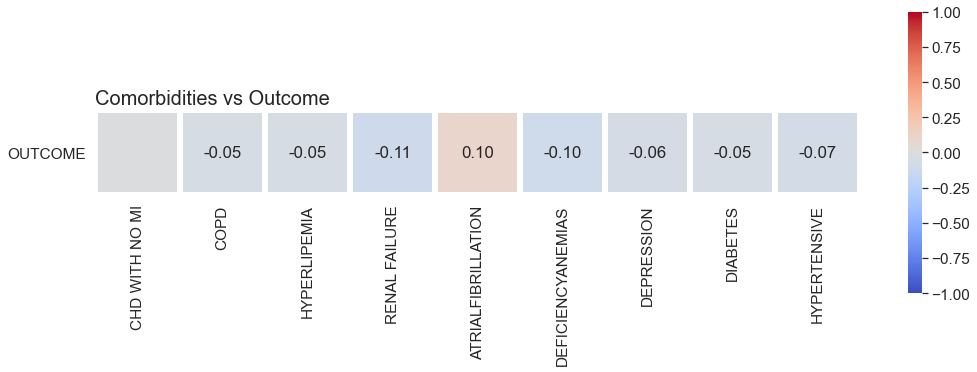

In [332]:
df_corr = gen_corr_matrix(df_cleaned, ['outcome'],  comorbidities_vars )
heatmap_full(df_corr, 'Comorbidities vs Outcome', True, 15, 6)

<p style = "color: green" >Renal Failure, Atrialfibrillation deficiencyanemias impacts outcome.</p>

#### 2.5.2.8 Lab_vars vs Outcome

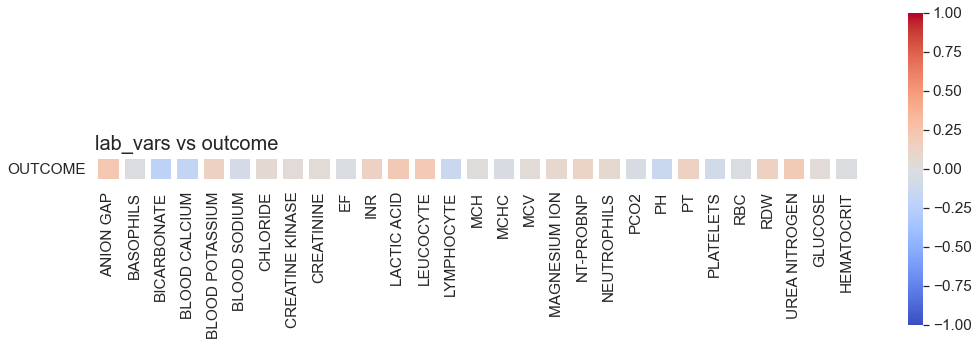

In [333]:
df_corr = gen_corr_matrix(df_cleaned, ['outcome'], lab_vars )
heatmap_full(df_corr, 'lab_vars vs outcome', False, 15, 6)

<p style = "color: green" >Anioin gap, lactic acid, leucocyte are correlated to outcome.</p>

## 3. Data Modelling <a id='DataModelling'></a>
<div style="text-align: right"
     
[TOC](#toc)

Here we'll model the data and try to predict the target variable (outcome) - whether a person dies or survives upon discharge, subsequently we will determine the reponses the following question: 

- What are the top 5 predictive features of mortality in HF patients?

### 3.1 Preparing the Data <a id='DataPrep'></a>
<div style="text-align: right"
     
[TOC](#toc)

##### Tranforming skewed continuous features

In [334]:
# Split the data into features and target (outcome) label
outcome_raw = df_cleaned['outcome']
features_raw = df_cleaned.drop(columns = ['outcome', 'group', 'ID', 'age_group', 'gender_txt'], axis = 1)

lets look at the distributions to figure out the heavily skewed features

`vital sign features`

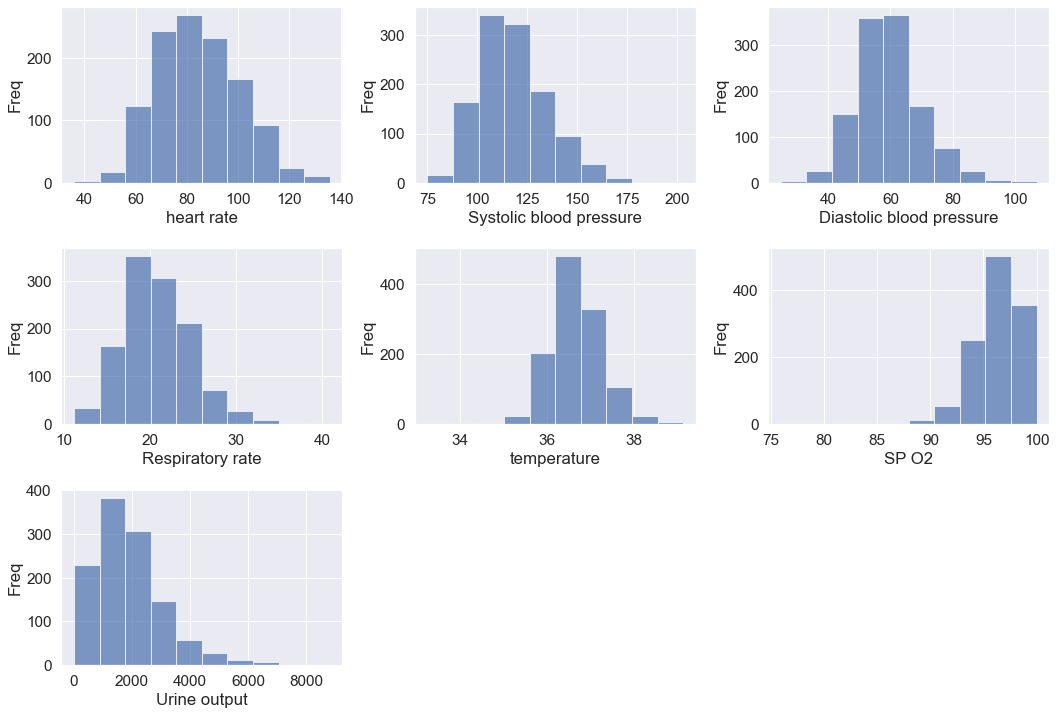

In [335]:
fig = plt.figure(figsize = [15,13])

for i in range(len(vital_sign_vars)):
    plt.subplot(4,3,i+1)
    plt.hist(data = df_cleaned, x = vital_sign_vars[i], alpha = 0.7)
    plt.xlabel(vital_sign_vars[i])
    #plt.legend()
    plt.ylabel('Freq');
    
fig.tight_layout()

from the above plot for the vital_signs we would need to transfrom `Urine output`

`demographic features`

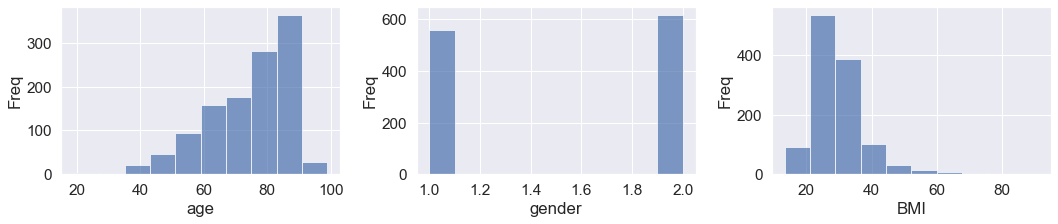

In [336]:
fig = plt.figure(figsize = [15,6])

for i in range(len(demo_vars)):
    plt.subplot(2,3,i+1)
    plt.hist(data = df_cleaned, x = demo_vars[i], alpha = 0.7)
    plt.xlabel(demo_vars[i])
    #plt.legend()
    plt.ylabel('Freq');
    
fig.tight_layout()

No Highly skewed demographic data

`laboratory features`

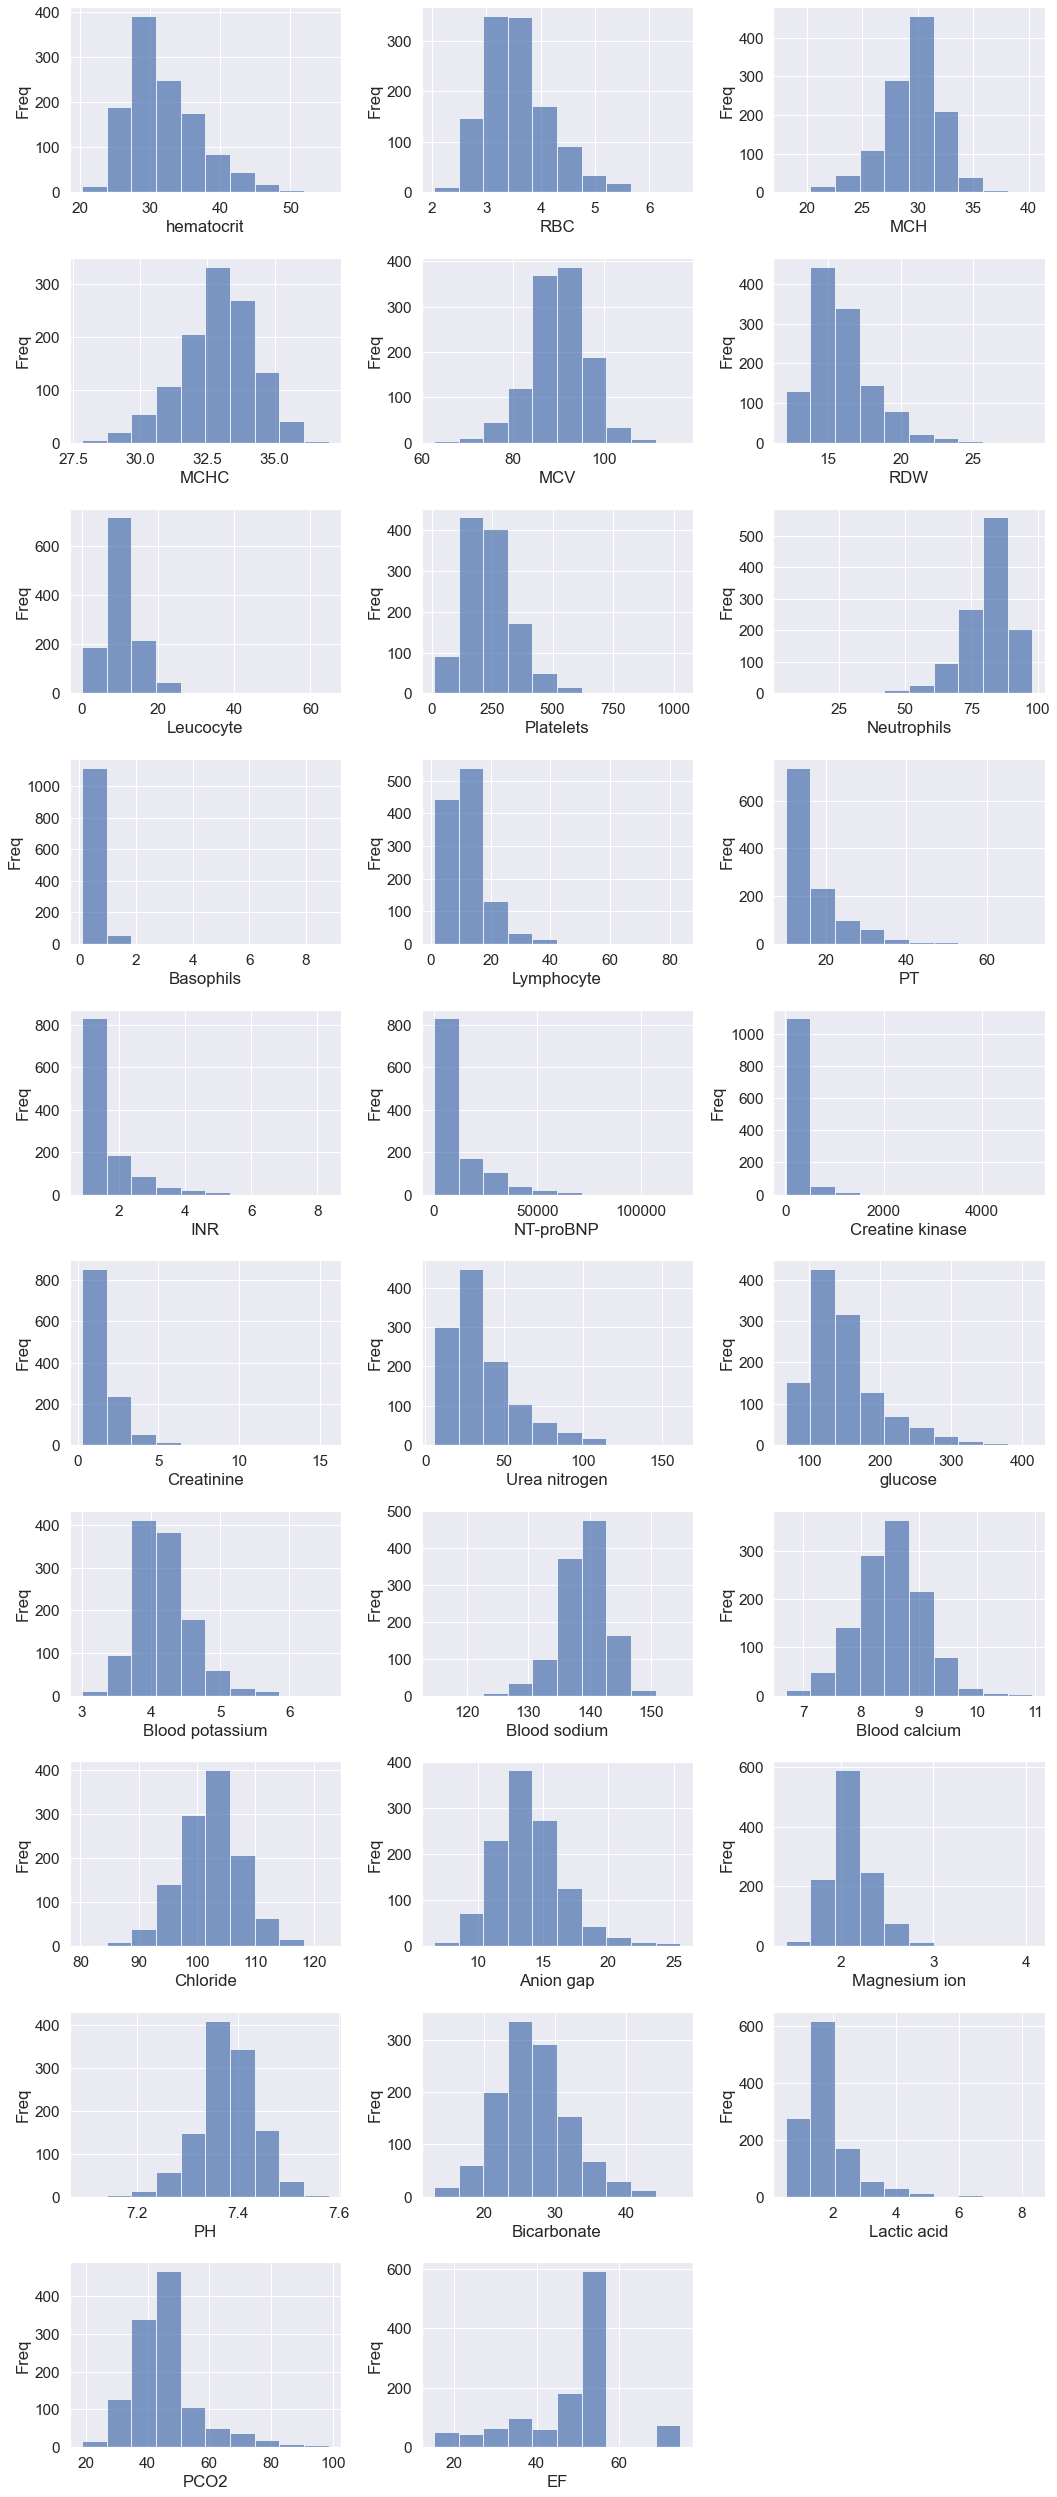

In [337]:
fig = plt.figure(figsize = [15,35])

for i in range(len(lab_vars)):
    plt.subplot(10,3,i+1)
    plt.hist(data = df_cleaned, x = lab_vars[i], alpha = 0.7)
    plt.xlabel(lab_vars[i])
    plt.ylabel('Freq');
    
fig.tight_layout()

`from the above plot for the vital_signs we would need to transfrom NT-proBNP, Creatine kinase`

In [338]:
# Applying log transormation to the skewed data

skewed = ['Urine output', 'NT-proBNP', 'Creatine kinase']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x+1))


In [339]:
features_log_transformed.columns

Index(['age', 'gender', 'BMI', 'hypertensive', 'atrialfibrillation',
       'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression',
       'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

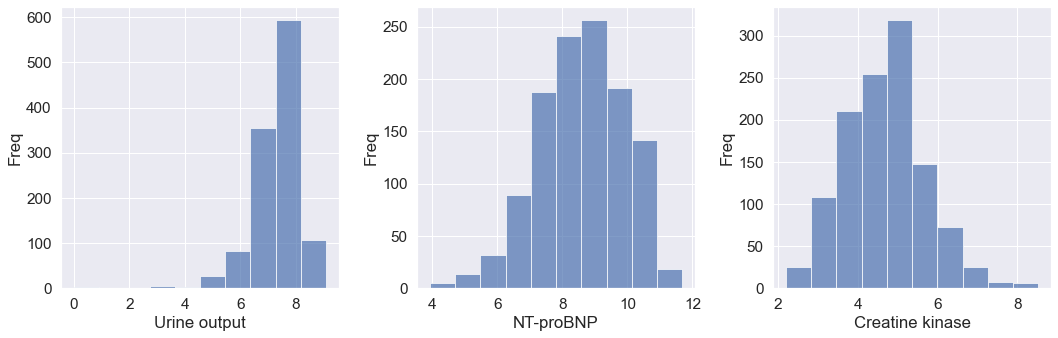

In [340]:
# Visualize distribution of transformed features

fig = plt.figure(figsize = [15,5])

for i in range(len(skewed)):
    plt.subplot(1,3,i+1)
    plt.hist(data = features_log_transformed, x = skewed[i], alpha = 0.7)
    plt.xlabel(skewed[i])
    plt.ylabel('Freq');
    
fig.tight_layout()

transformed variables no longer skewed

### 3.2 Normalizaing Numerical Features <a id='NormNum'></a>
<div style="text-align: right"
     
[TOC](#toc)

Here we normalize numerical features that are not between 1s and 0s

In [341]:


#initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default = (0,1)
num_vars = lab_vars +vital_sign_vars + ['age', 'BMI']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_vars] = scaler.fit_transform(features_log_transformed[num_vars])

#Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

age  gender       BMI  hypertensive  atrialfibrillation  CHD with no MI  \
0  0.6625       1  0.311466             0                   0               0   
1  0.7000       2  0.217852             0                   0               0   
2  0.8000       2  0.169933             0                   0               0   
3  0.3000       2  0.898342             0                   0               0   
4  0.7000       2  0.237416             1                   0               0   

   diabetes  deficiencyanemias  depression  Hyperlipemia  ...  Blood sodium  \
0         1                  1           0             1  ...      0.601029   
1         0                  1           0             0  ...      0.604495   
2         0                  1           0             0  ...      0.650050   
3         0                  0           0             0  ...      0.594790   
4         0                  1           0             0  ...      0.549037   

   Blood calcium  Chloride  Anion gap  Magnesium ion        PH  Bicarbonate  \
0       0.179679  0.683867   0.346185       0.455782  0.285714     0.238714   
1       0.344118  0.430145   0.254886       0.182398  0.275510     0.591427   
2       0.368627  0.605553   0.178313       0.283285  0.363265     0.508892   
3       0.653394  0.279339   0.303270       0.203110  0.571429     0.738714   
4       0.478431  0.573439   0.452209       0.093537  0.326531     0.262654   

   Lactic acid      PCO2        EF  
0     0.000000  0.266124  0.666667  
1     0.000000  0.742016  0.666667  
2     0.000000  0.660614  0.333333  
3     0.012766  0.704446  0.666667  
4     0.012766  0.391359  0.666667  

[5 rows x 48 columns]

In [342]:
features_final = features_log_minmax_transform.copy()

### 3.3 Shuffle and Split Data <a id='ShuffleSplitData'></a>
<div style="text-align: right"
     
[TOC](#toc)

In [343]:



X_train, X_test, y_train, y_test = train_test_split(features_final, outcome_raw, 
                                                    test_size = 0.2, random_state = 0)


#show the results of the split
print('Training set has {} samples.'.format(X_train.shape[0]))
print('Texting set has {} samples.'.format(X_test.shape[0]))

Training set has 940 samples.
Texting set has 236 samples.


In [344]:
#Estimating the accuracy and f-score for a naive predictor that 
# often predicts that at discharge, a patient always dies (ie outcome of 1)

'''
TP = np.sum(outcome_raw) # Counting the ones as this is the naive case.
FP = outcome_raw.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# Calculate accuracy, precision and recall
TP = np.sum(outcome_raw)
FP = outcome_raw.count() - TP
TN = 0
FN = 0
accuracy = TP/FP
recall = TP/(TP + FN)
precision = TP/(TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5**2) * (precision * recall)/((0.5**2 * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.1563, F-score: 0.1635]


### 3.4 Creating a Trainning and Predicting Pipeline <a id='TrainPredPipe'></a>
<div style="text-align: right"
     
[TOC](#toc)

In [345]:


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs: 
        - learner: the learning algorithm to be trained and predicted on
        - sample_size: the size of samples (number) to be drawn from training set
        - X_train: features training set
        - y_train: outcome training set
        - X_test: features testing set
        - y_test: income testing set
    
    '''
    
    results = {}
    
    # Fit learner to the training data using slicing with 'sample_size'
    start = time() # get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # get end time
    
    # Calculate the training time
    results['train_time'] = end - start
    
    # Get the predictions on the test set(X_test), 
    # then get the predictions on the first 300 training samples(X_train)
    # using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end  = time()
    
    #Calculate the total prediction time
    results['pred_time'] = end - start
    
    # Compute accuracy on the first 300 training samples which is y_train [:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    
    # compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the first 300 training samples using fbeter_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, 0.5)
    
    # Compute F-score on the first 300 training samples using fbeta_score()
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5)
    
    # print out
    print('{} trained on {} samples.'.format(learner.__class__.__name__, sample_size))
    
    # Return the results
    return results

### 3.5. Model Training, Tuning and Evaluation <a id='ModelTTE'></a>
<div style="text-align: right"
     
[TOC](#toc)

We'll test out 3 models and select the optimal one to go forward with for the modelling

C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renami

AdaBoostClassifier trained on 9 samples.
AdaBoostClassifier trained on 94 samples.


C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renami

AdaBoostClassifier trained on 940 samples.
RandomForestClassifier trained on 9 samples.


C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RandomForestClassifier trained on 94 samples.


C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\succa\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renami

RandomForestClassifier trained on 940 samples.
SVC trained on 9 samples.
SVC trained on 94 samples.
SVC trained on 940 samples.


X:\Drive\Career\LearningResources\Programming\DataScience\Udacity\4_DataScienceAdvanced\1_IntroToDataScience\Project\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


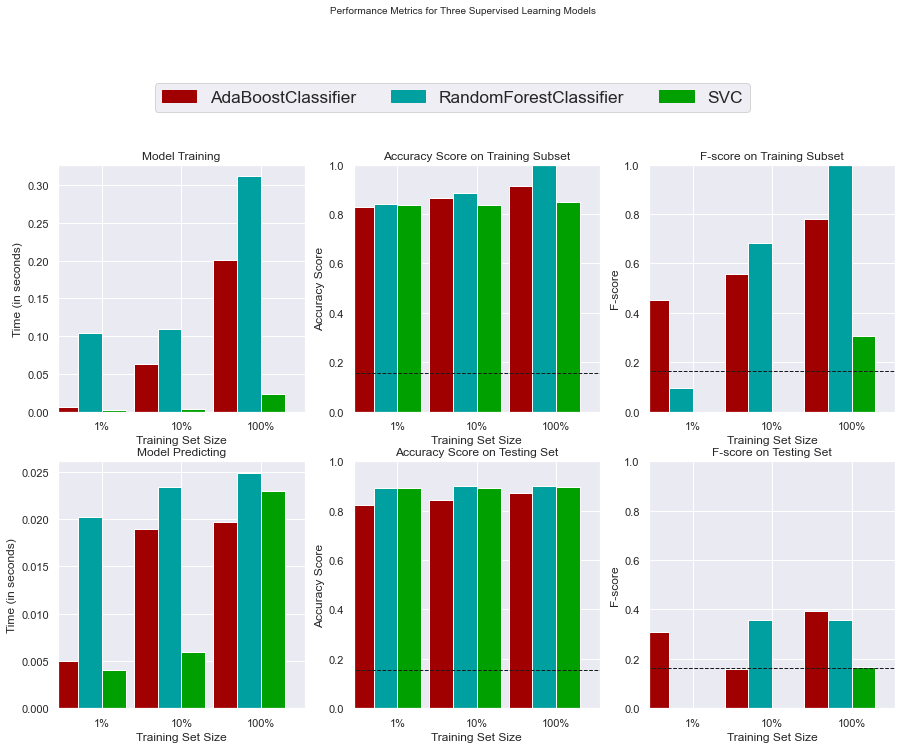

In [346]:
sb.set(font_scale=1)



# Initialize the three models
clf_A = AdaBoostClassifier(random_state = 42)
clf_B = RandomForestClassifier(random_state = 42)
clf_C = SVC(random_state = 42)

# Calculate number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100
# sample_1 is 1% of samples_100

samples_100 = len(y_train)
samples_10 = int(0.1 * len(y_train))
samples_1 = int(0.01 * len(y_train))

# collect results on the learners
results = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

        
# Run metrics visualization for the tree supervised learning models chosen
vs.evaluate(results, accuracy, fscore)


`Adaboost` selected as model of choice to improve on and use in the predicitons


The best model was selected in comparison to the other 2 models tested based on the following:

`Fscore`: <br>
> Random forest has very high scores on both accuracy and F-Score when used to make predictions on the training set; this is because is is overfitting the training data. 
SVM has a low F-score even though it has a high accuracy.
Adaboost has a high f-score on the training set and doesn't overfit as RandomForest. on the testing set at 100% of sample size adaboost has the highest f-score

`Accuracy:`
> On accuracy the model performance is very similar except for the 100% sample size on the training subset where randomforest is overfitting the data.

`Training time.`
> Adaboast takes less time to train relative to the other models at 100% of the sample size for the test dataset.




In [347]:
# Print hyperparameters of the model before tuning
clf_A.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [348]:


# Initialize the classifier
clf = AdaBoostClassifier(random_state = 42)

# Tuning parameters
parameters = {'n_estimators': [5, 10, 50, 75, 100, 200, 300, 400, 500],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 1]}


# setup fbeter_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# Perform grid search on the classifier using scorer as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)


#fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


Unoptimized model
------
Accuracy score on testing data: 0.8729
F-score on testing data: 0.3947

Optimized Model
------
Final accuracy score on the testing data: 0.8898
Final F-score on the testing data: 0.4054


In [349]:
# print the parameters of the tunned model
best_clf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_state': 42}

### 3.6. Feature Importance <a id='FeatureImportance'></a>
<div style="text-align: right"
     
[TOC](#toc)

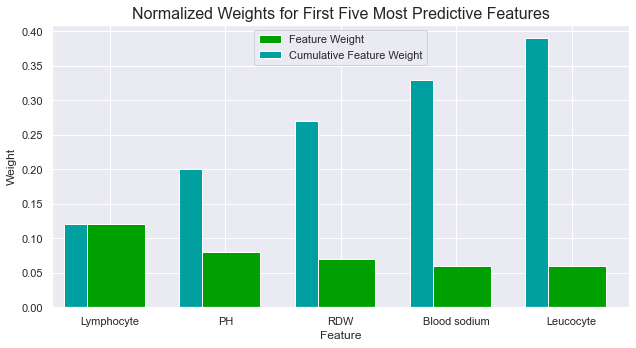

In [350]:
sb.set(font_scale=1)
importances = best_clf.feature_importances_
vs.feature_plot(importances, X_train, y_train)

<p style = "color: green"> Plot above shows that (in decreasing order) <em> Lymphocyte,  pH, RDW, Blood sodium, and Leucocyte </em> aret the 5 most predictive features of HF patients mortality </p>

In [351]:
feature_rank = importances.tolist()
feature_list = features_final.columns.tolist()
df_features_rank= pd.DataFrame(list(zip(feature_list, feature_rank)), columns = ['feature', 'rank'])
df_features_rank.sort_values(by=['rank'], ascending = False, inplace = True)
df_features_rank['rank_cum_sum'] = df_features_rank['rank'].cumsum()

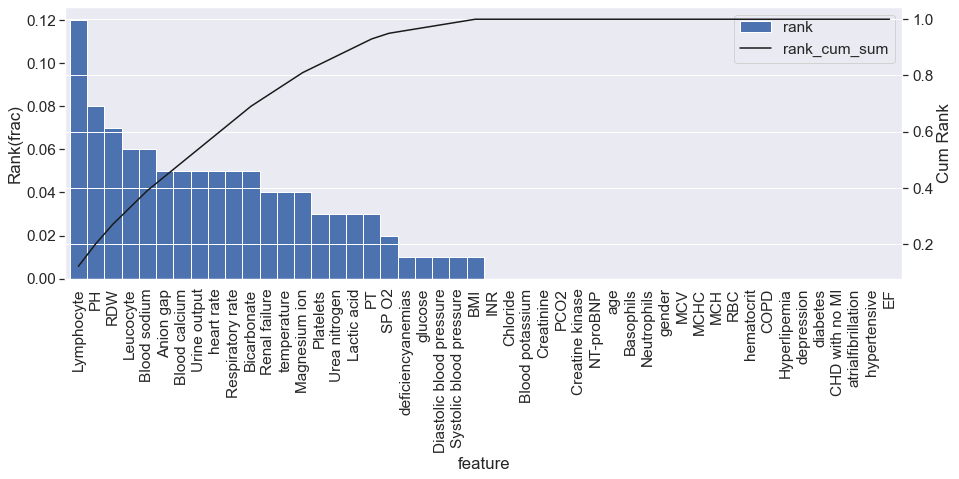

In [352]:
sb.set(font_scale=1.4)
ax = df_features_rank.plot.bar(y = 'rank', ylabel = 'Rank(frac)', figsize = (15,5) , x = 'feature', width = 1.0)
#ax.xticks(rotation=30, horizontalalignment="center")
df_features_rank.plot(y = 'rank_cum_sum', c = 'k', ax = ax, use_index = False, secondary_y =  True, mark_right = False, rot = 90)
ax.right_ax.set_ylabel('Cum Rank');
sb.set(font_scale=1)

#ax.legend(loc='best')
#plt.legend(loc='best');

<p style = "color: green"> Above plot is the order of feature importance for the whole feature set.</p>

## 4. Conclusion <a id='Conclusion'></a>
<div style="text-align: right"
     
[TOC](#toc)

<font color = green>
The work done in this workbook answers the questions possed in the synopsis as listed below; <br>

- What are the top 3 prevalent comorbidities in HF patients and how does it vary with age?
> The top 3 prevalent comorbidities are Hypertension, atrial fibrillation and diabetes<br>
> In general, older patients are more likely to have these top 3 comorbidities.
    
- What are the major inter-relationships between the vital signs? 
> Diastolic BP correlates strongly with Systoic BP, Urine Output and Heart Rate.<br>
> Respiratory Rate strongly correlates with Heart Rate, Temperatur and SP02.<br>
> Temperature strongly correlates with urine output and heart rate.<br>


- What are the major inter-relationships between the comorbities?
> Diabetes is correlated to hyperlipemia, renal failure and hypertension.<br>
> deficiency anemias is correlated to renal failure, atrial fibrillation, and depression<br>


- What are the top 5 predictive features of mortality in HF patients?
> These are (from most predictive to least predictive): Lymphocyte, Blood sodium, PH feature RDW, and Leucocite
</font> 
</p>

## 5. References <a id='Reference'></a>
<div style="text-align: right"
     
[TOC](#toc)

- Stackover flow
- Udacity lecture material
- https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c